# Rainfall Prediction - Weather Forecasting

**Problem Statement:**
    
**Rain Prediction –Weather forecasting**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
df.shape

(8425, 23)

# Preprocessing and EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
df.isnull().sum() #finding null values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
#checking counts for all columns
for column in df.columns:

        print(df[column].value_counts())
        print('_______________________________________________')


2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
_______________________________________________
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
_______________________________________________
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64
_______________________________________________
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
_________________________

Treating Null values

In [7]:
#replacing null value
df['WindGustDir'].fillna("N",inplace=True)
df['WindDir9am'].fillna("N",inplace=True)
df['WindDir3pm'].fillna("SE",inplace=True)
df['RainToday'].fillna("No",inplace=True)
df['RainTomorrow'].fillna("No",inplace=True)

In [8]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(),inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(),inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)


In [9]:
df.isnull().sum() #checking null values again

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

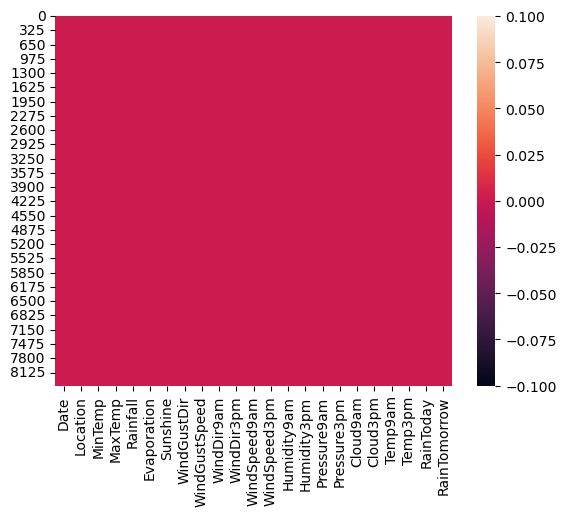

In [10]:
sns.heatmap(df.isnull())

Now there is no null value

In [15]:
#Checking description of data set
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.379488     6.114516    10.309308     3.852004     2.825451   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.300000    19.300000     0.000000     4.000000     7.632205   
50%      13.200000    23.300000     0.000000     5.389395     7.632205   
75%      17.300000    28.000000     1.400000     5.389395     8.900000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

In [11]:
#checking categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
# checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Visualization

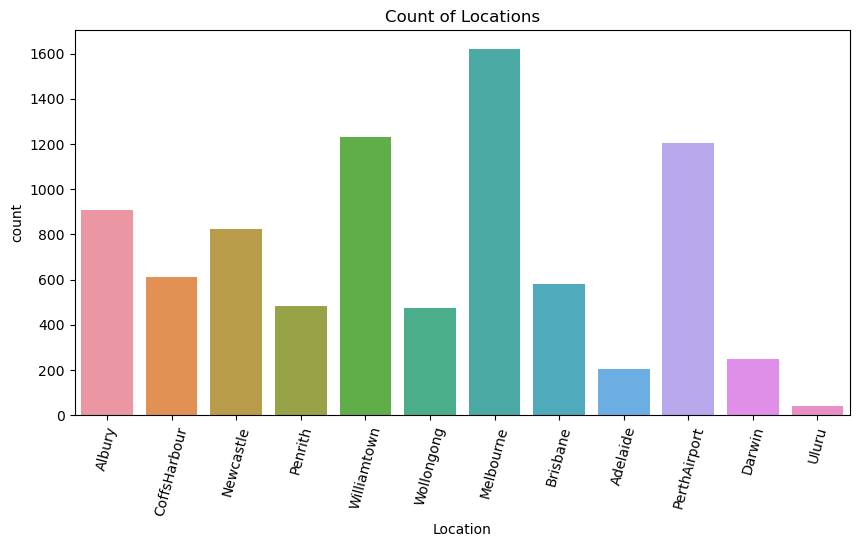

In [14]:
# Visualizing the various Locations present in the dataset
plt.figure(figsize=(10,5))
sns.countplot(df["Location"])
plt.title("Count of Locations")
plt.xticks(rotation=75)
plt.show()

We can see the highest rainfall is from Melbourbne and lowest is from Uluru.

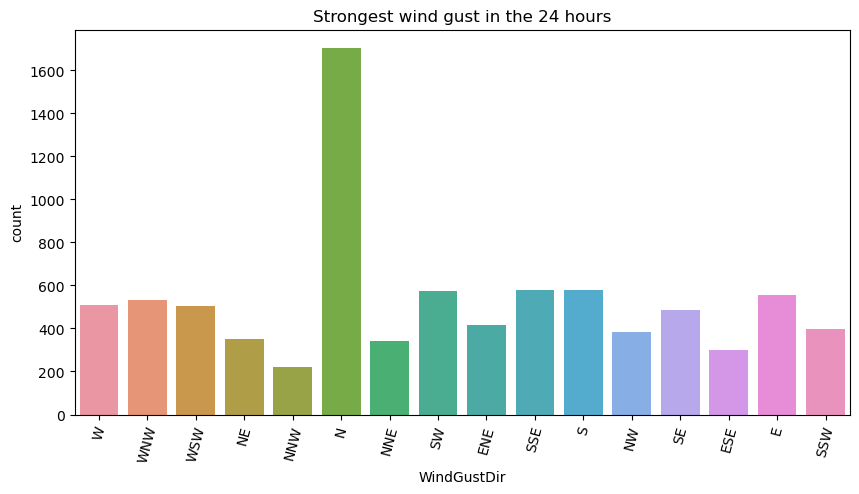

In [16]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(df["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

We observe that the wind gust is strongest towards the north, followed by the SW, SSE, S,WNW.

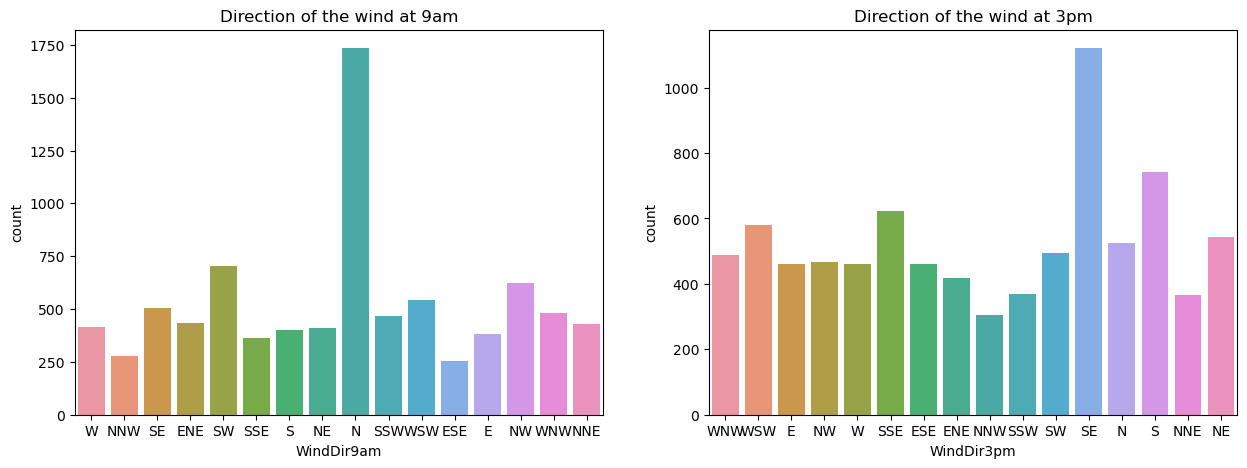

In [17]:
#Visualization of wind at 9 am and 3pm.
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Direction of the wind at 9am')
sns.countplot(df['WindDir9am'])
plt.subplot(1,2,2)
plt.title('Direction of the wind at 3pm')
sns.countplot(df['WindDir3pm'])
plt.show()

We can see wind direction is towards north at 9 am and at 3 pm it is towards south-east.

<AxesSubplot:title={'center':'RainToday'}, xlabel='RainToday', ylabel='count'>

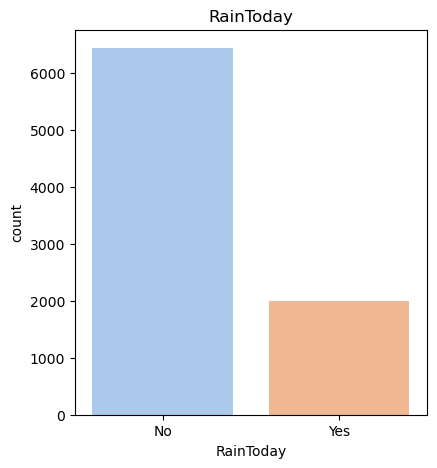

In [18]:
#Visualization of Rainfall today and tomorrow:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('RainToday')
sns.countplot(df['RainToday'],palette='pastel')


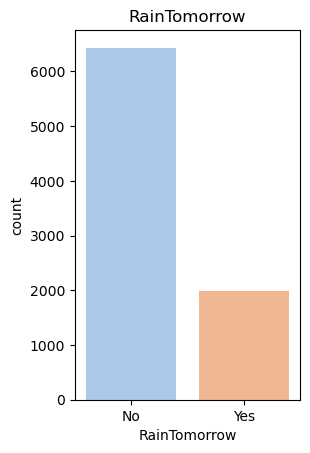

In [19]:
plt.subplot(1,2,2)
plt.title('RainTomorrow')
sns.countplot(df['RainTomorrow'], palette='pastel')
plt.show()

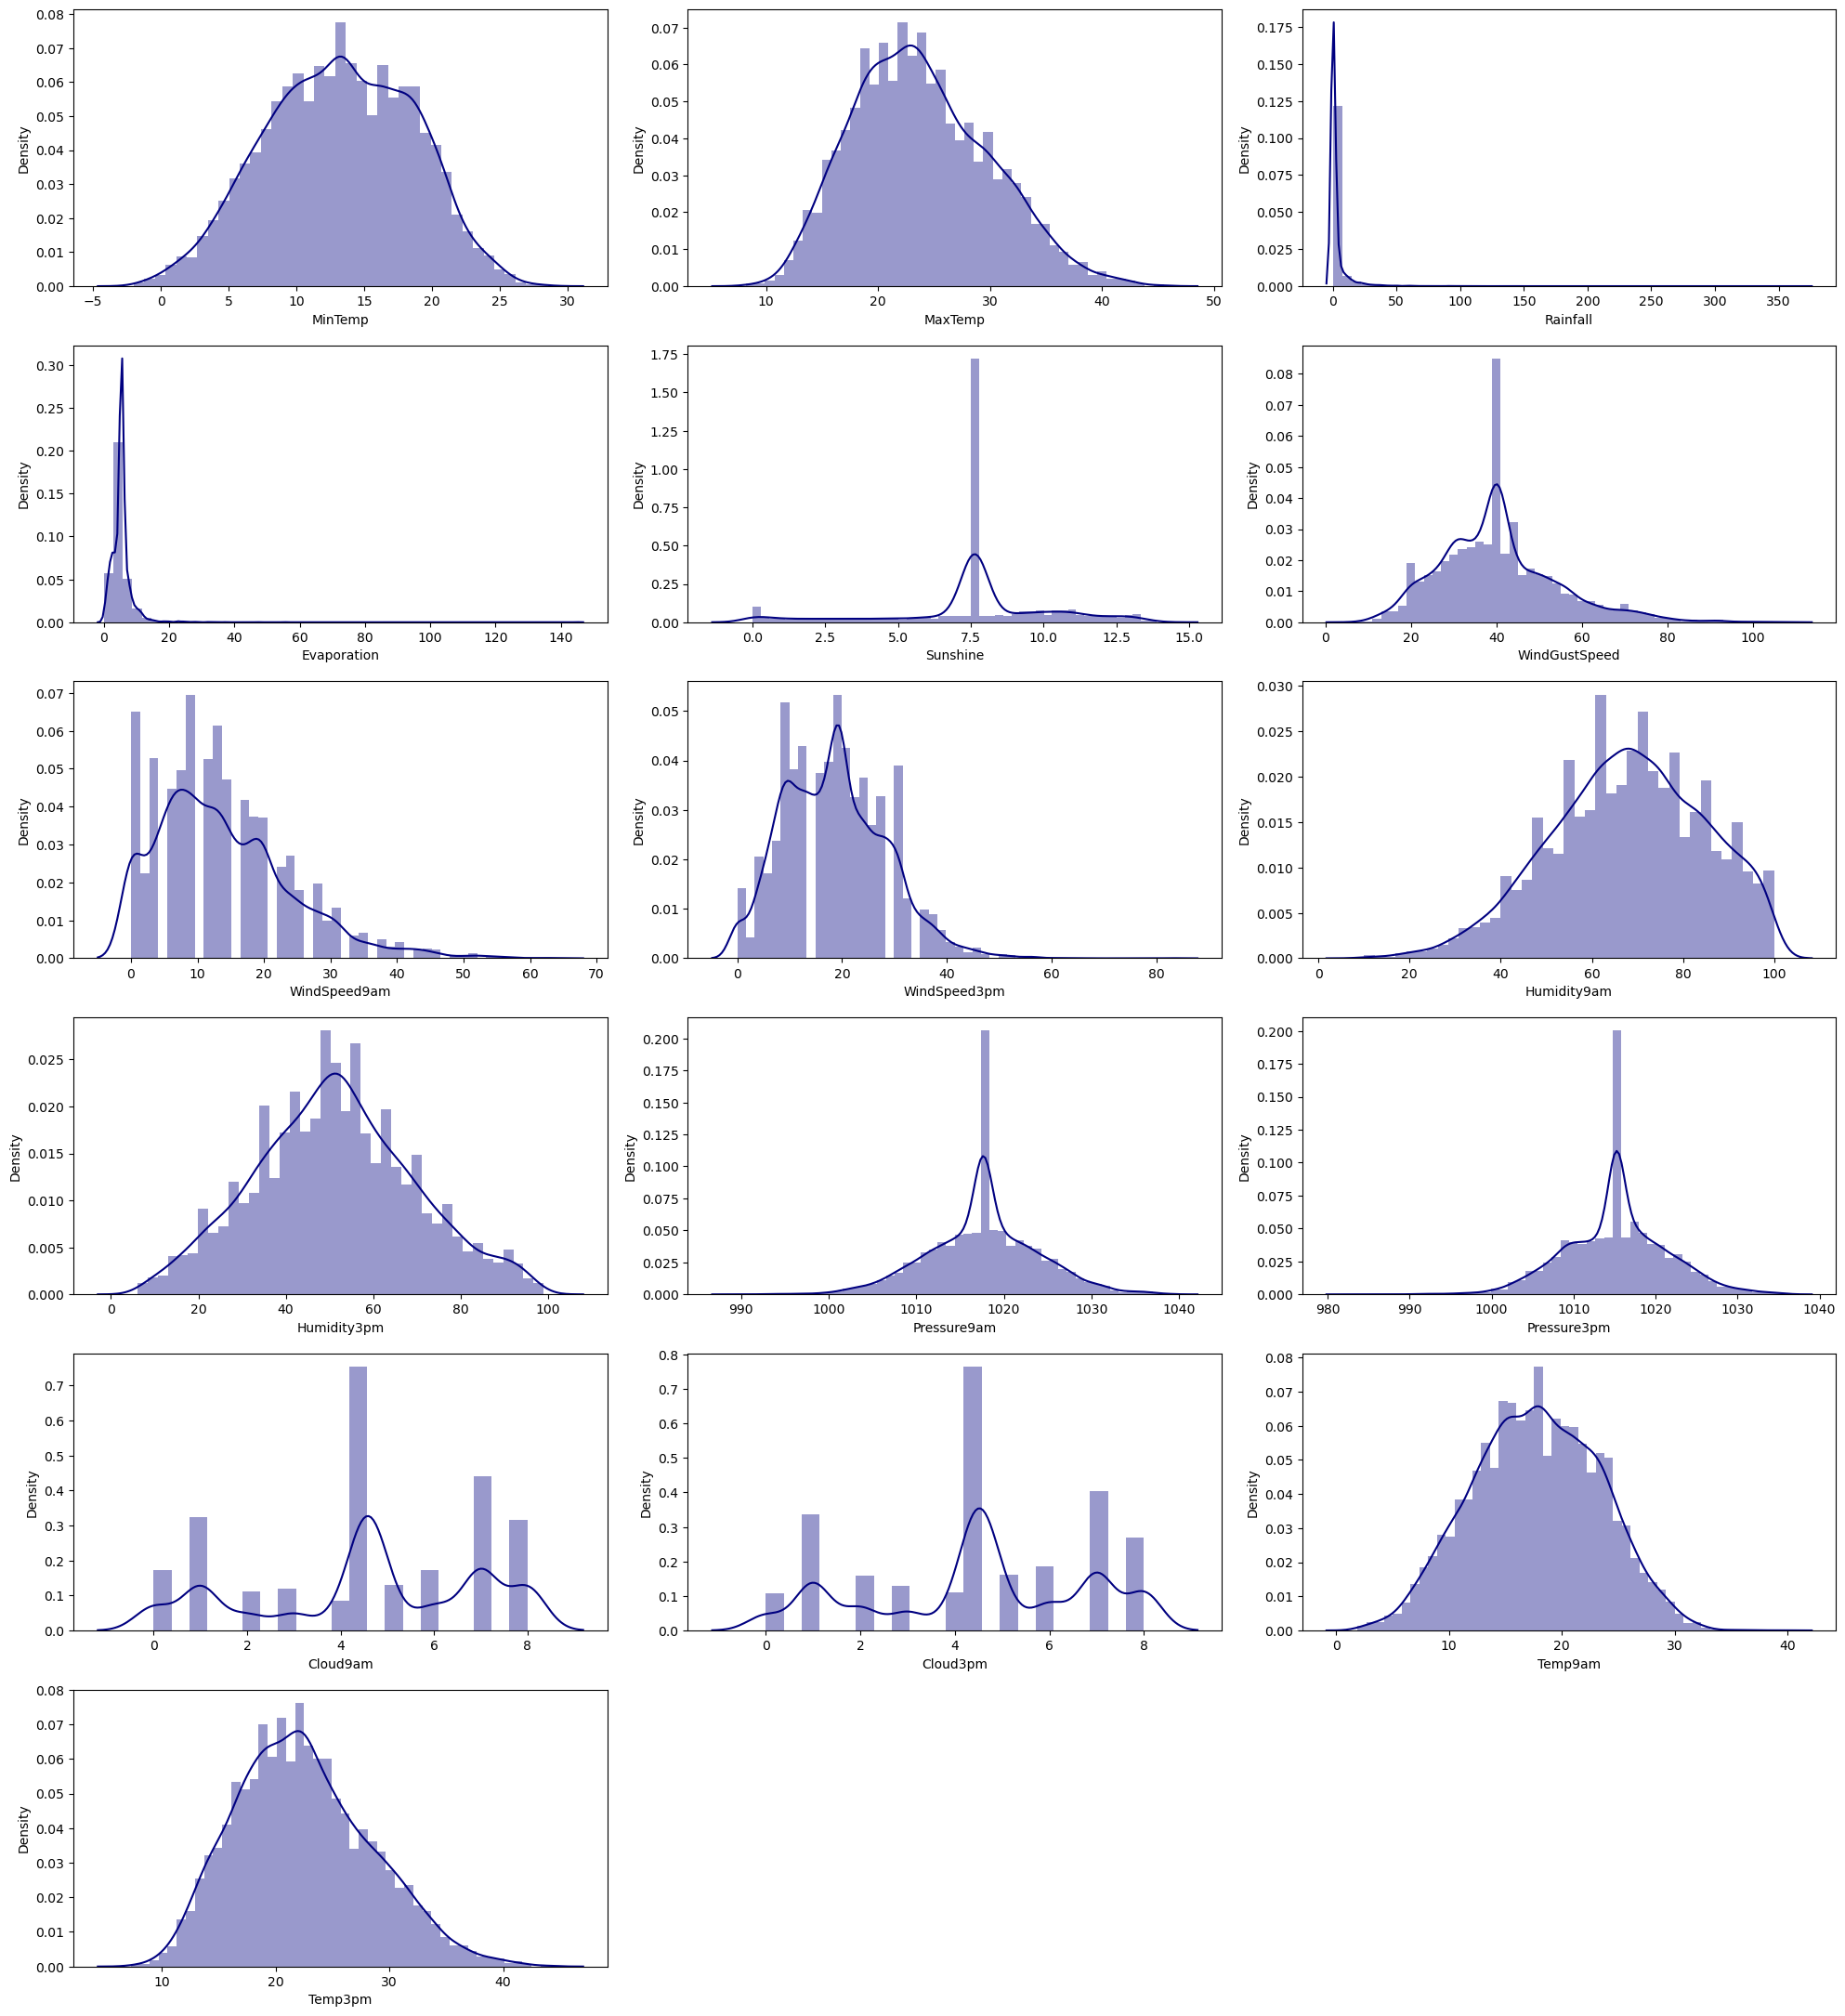

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df[column],color="navy")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From the graphs we can say that the dataset is not normally distributed.

Min Temp,Sunshine is normally distributed

Max Temp is slightly skewed right

WindGustSpeed, WindSpeed9am,WindSpeed3pm,Rainfall and Evaporation is skewed right

Humidity9am is slightly skewed left and Humidity3pm is normally distributed.

Pressure9am, Pressure3pm, Cloud9am, Cloud3pm,Temp9am,Temp3pm,Day, Month and Year has no skewness however the data is not distributed normally

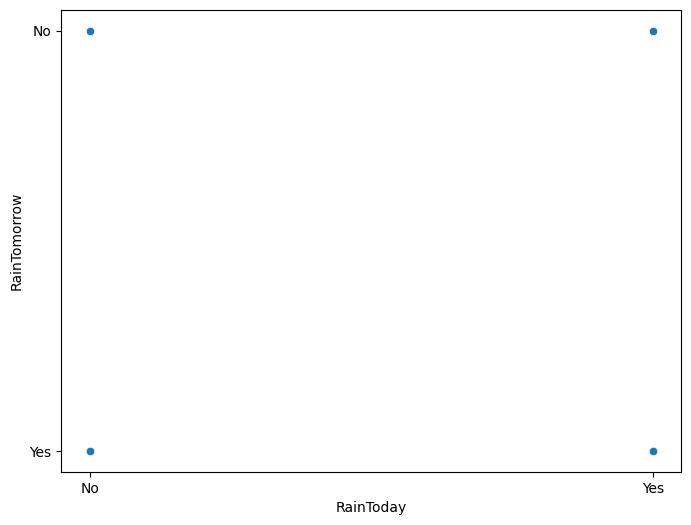

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['RainToday'],y=df['RainTomorrow'])
plt.show()

We dont find any relation between Rain today and tomorrow.

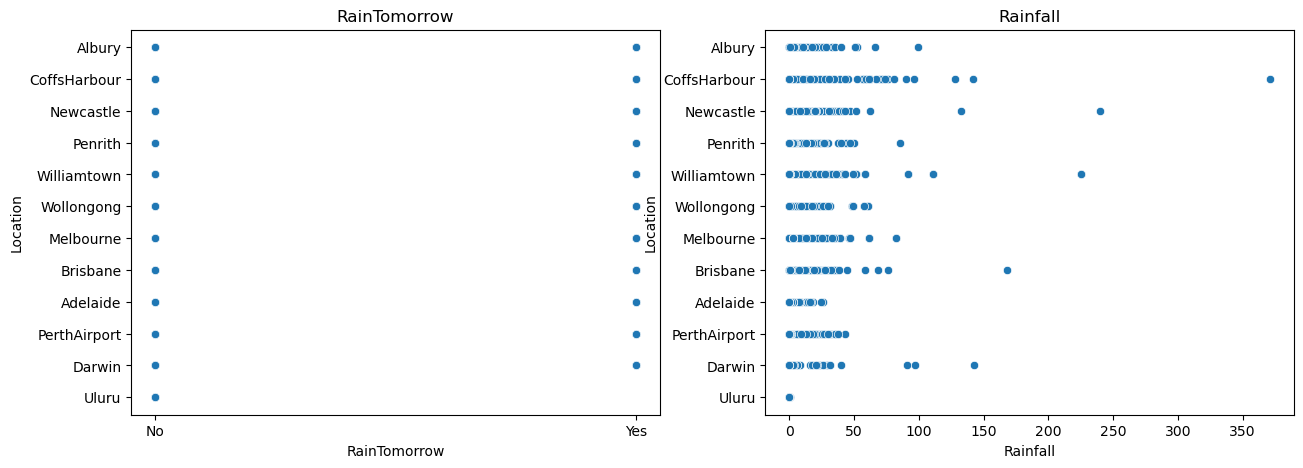

In [22]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=df)

plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=df)
plt.show()

We can see that location does not have much impact on rainfall.

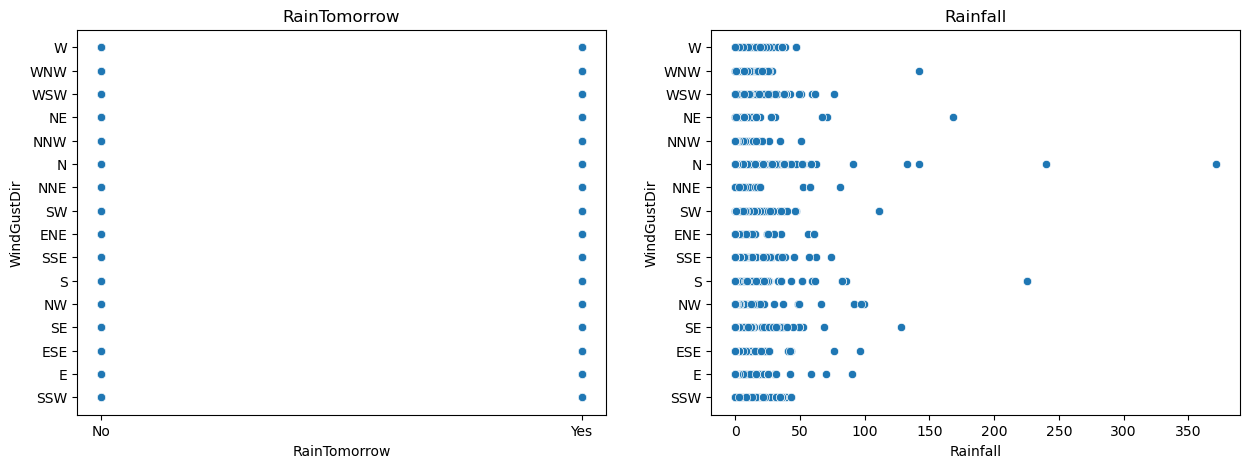

In [23]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=df)
plt.show()

We dont see any linear relation with WindGustDir and target.

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

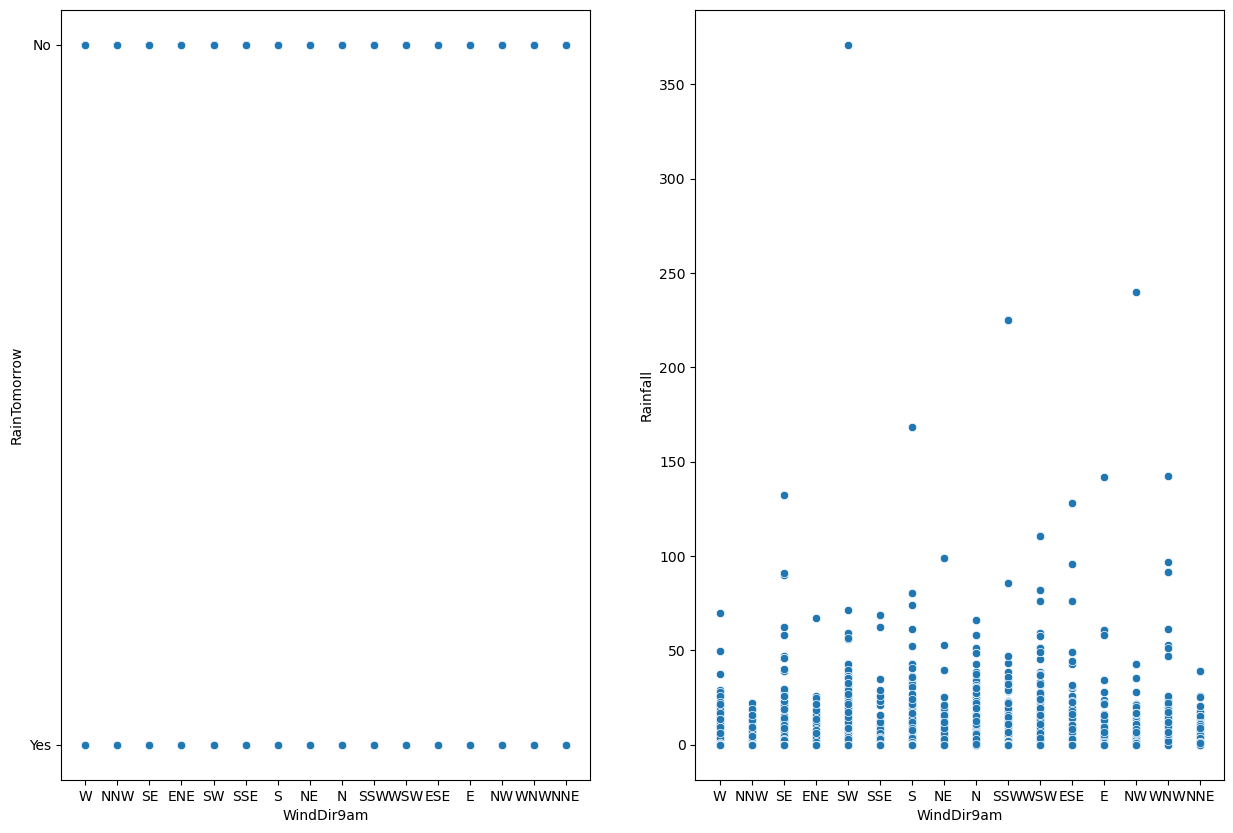

In [24]:
fig,axes=plt.subplots(1,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0],palette="OrRd",data=df)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1],palette="OrRd",data=df)


<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

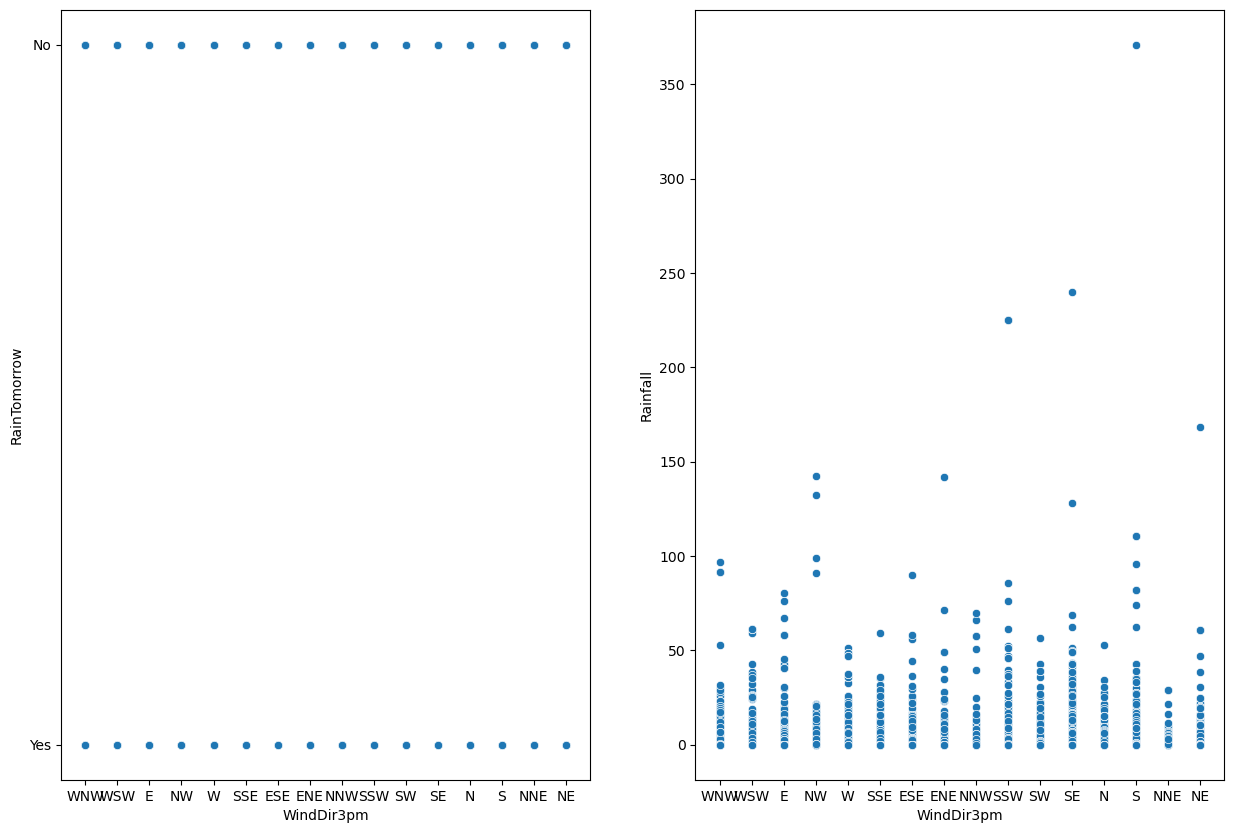

In [25]:

fig,axes=plt.subplots(1,2,figsize=(15,10))
#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0],palette="OrRd",data=df)


#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1],palette="OrRd",data=df)

We dont find any linear relation here as well.

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

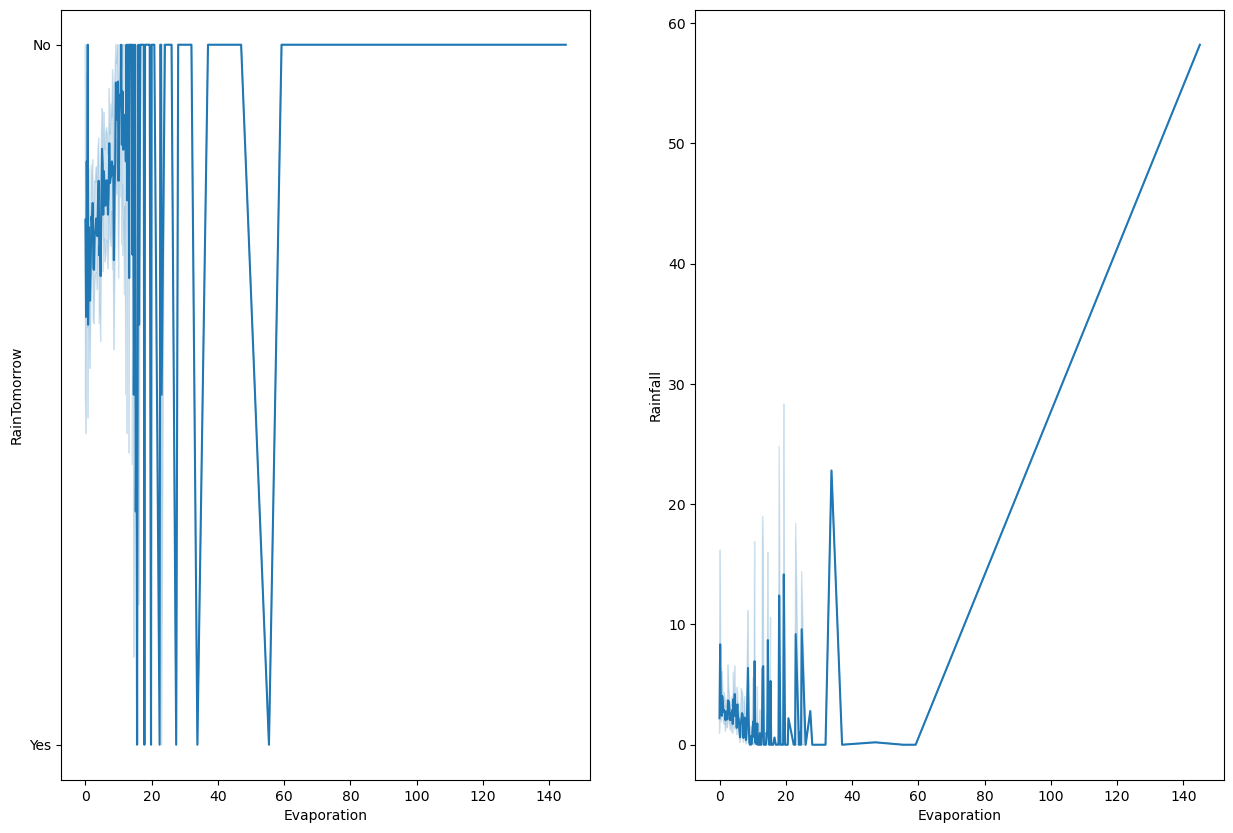

In [26]:
fig,axes=plt.subplots(1,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1],palette="OrRd",data=df)


<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

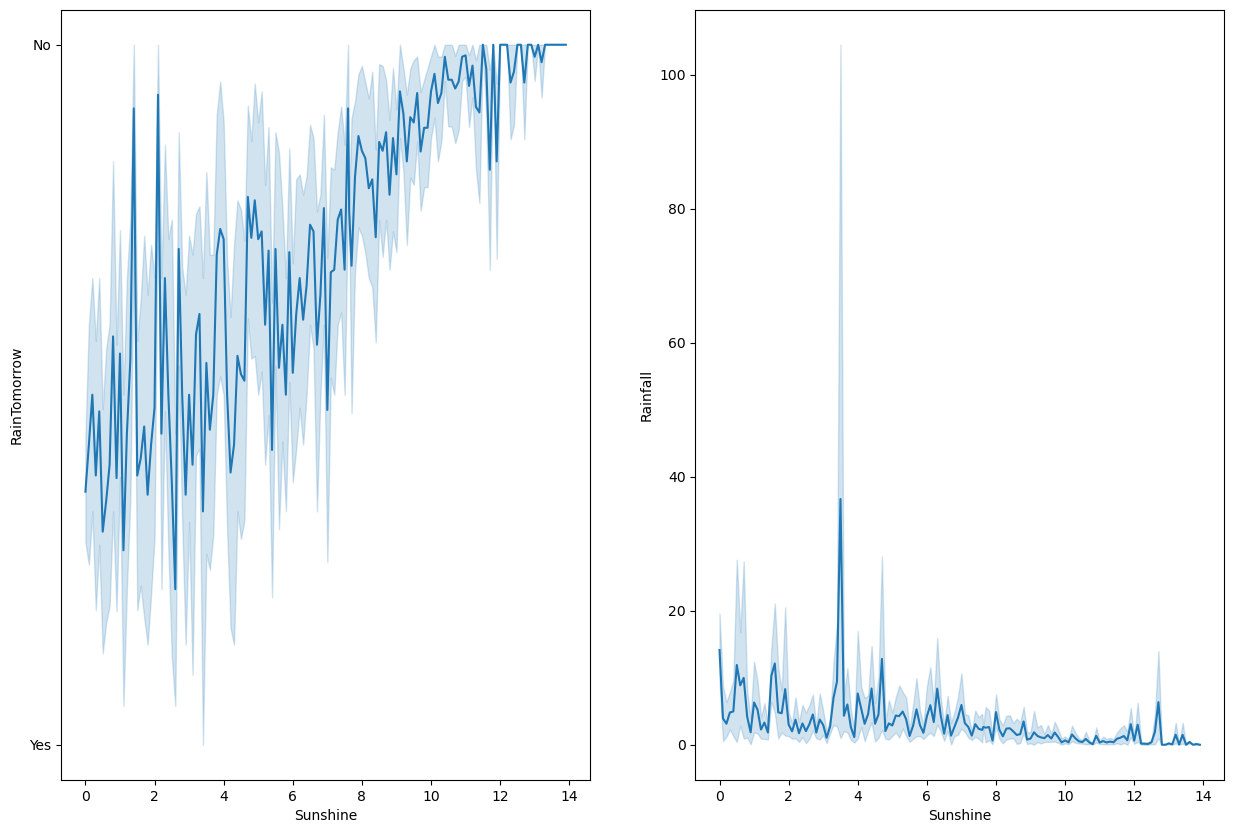

In [27]:
fig,axes=plt.subplots(1,2,figsize=(15,10))
#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0],palette="OrRd",data=df)


#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1],palette="OrRd",data=df)


We can clearly see the relation in the graphs. Sunshine feature is inversely proportional to the Rainfall feature whereas Evaporation directly proportional to rainfall.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

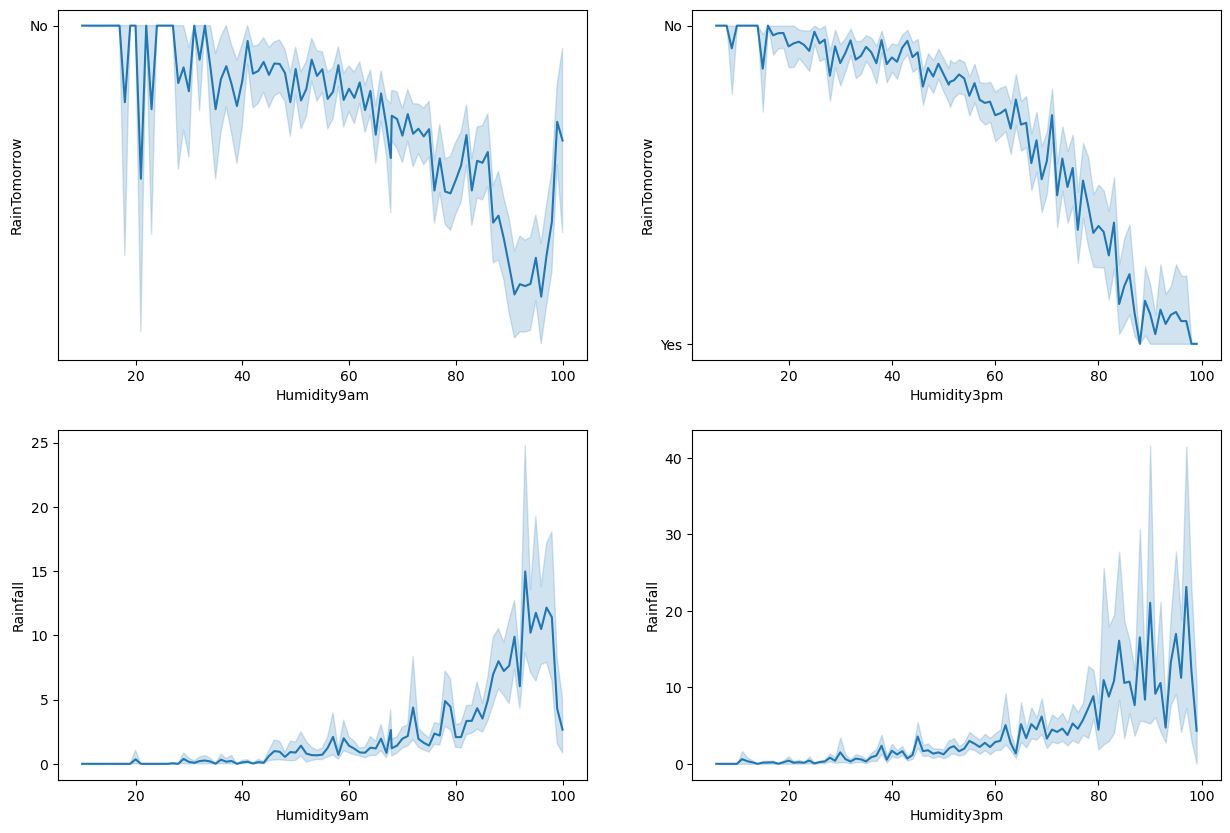

In [28]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=df)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=df)

Here we can see an inverse relation between humidity and rain tomorrow, also there is a positive relation between humidity and Rainfall

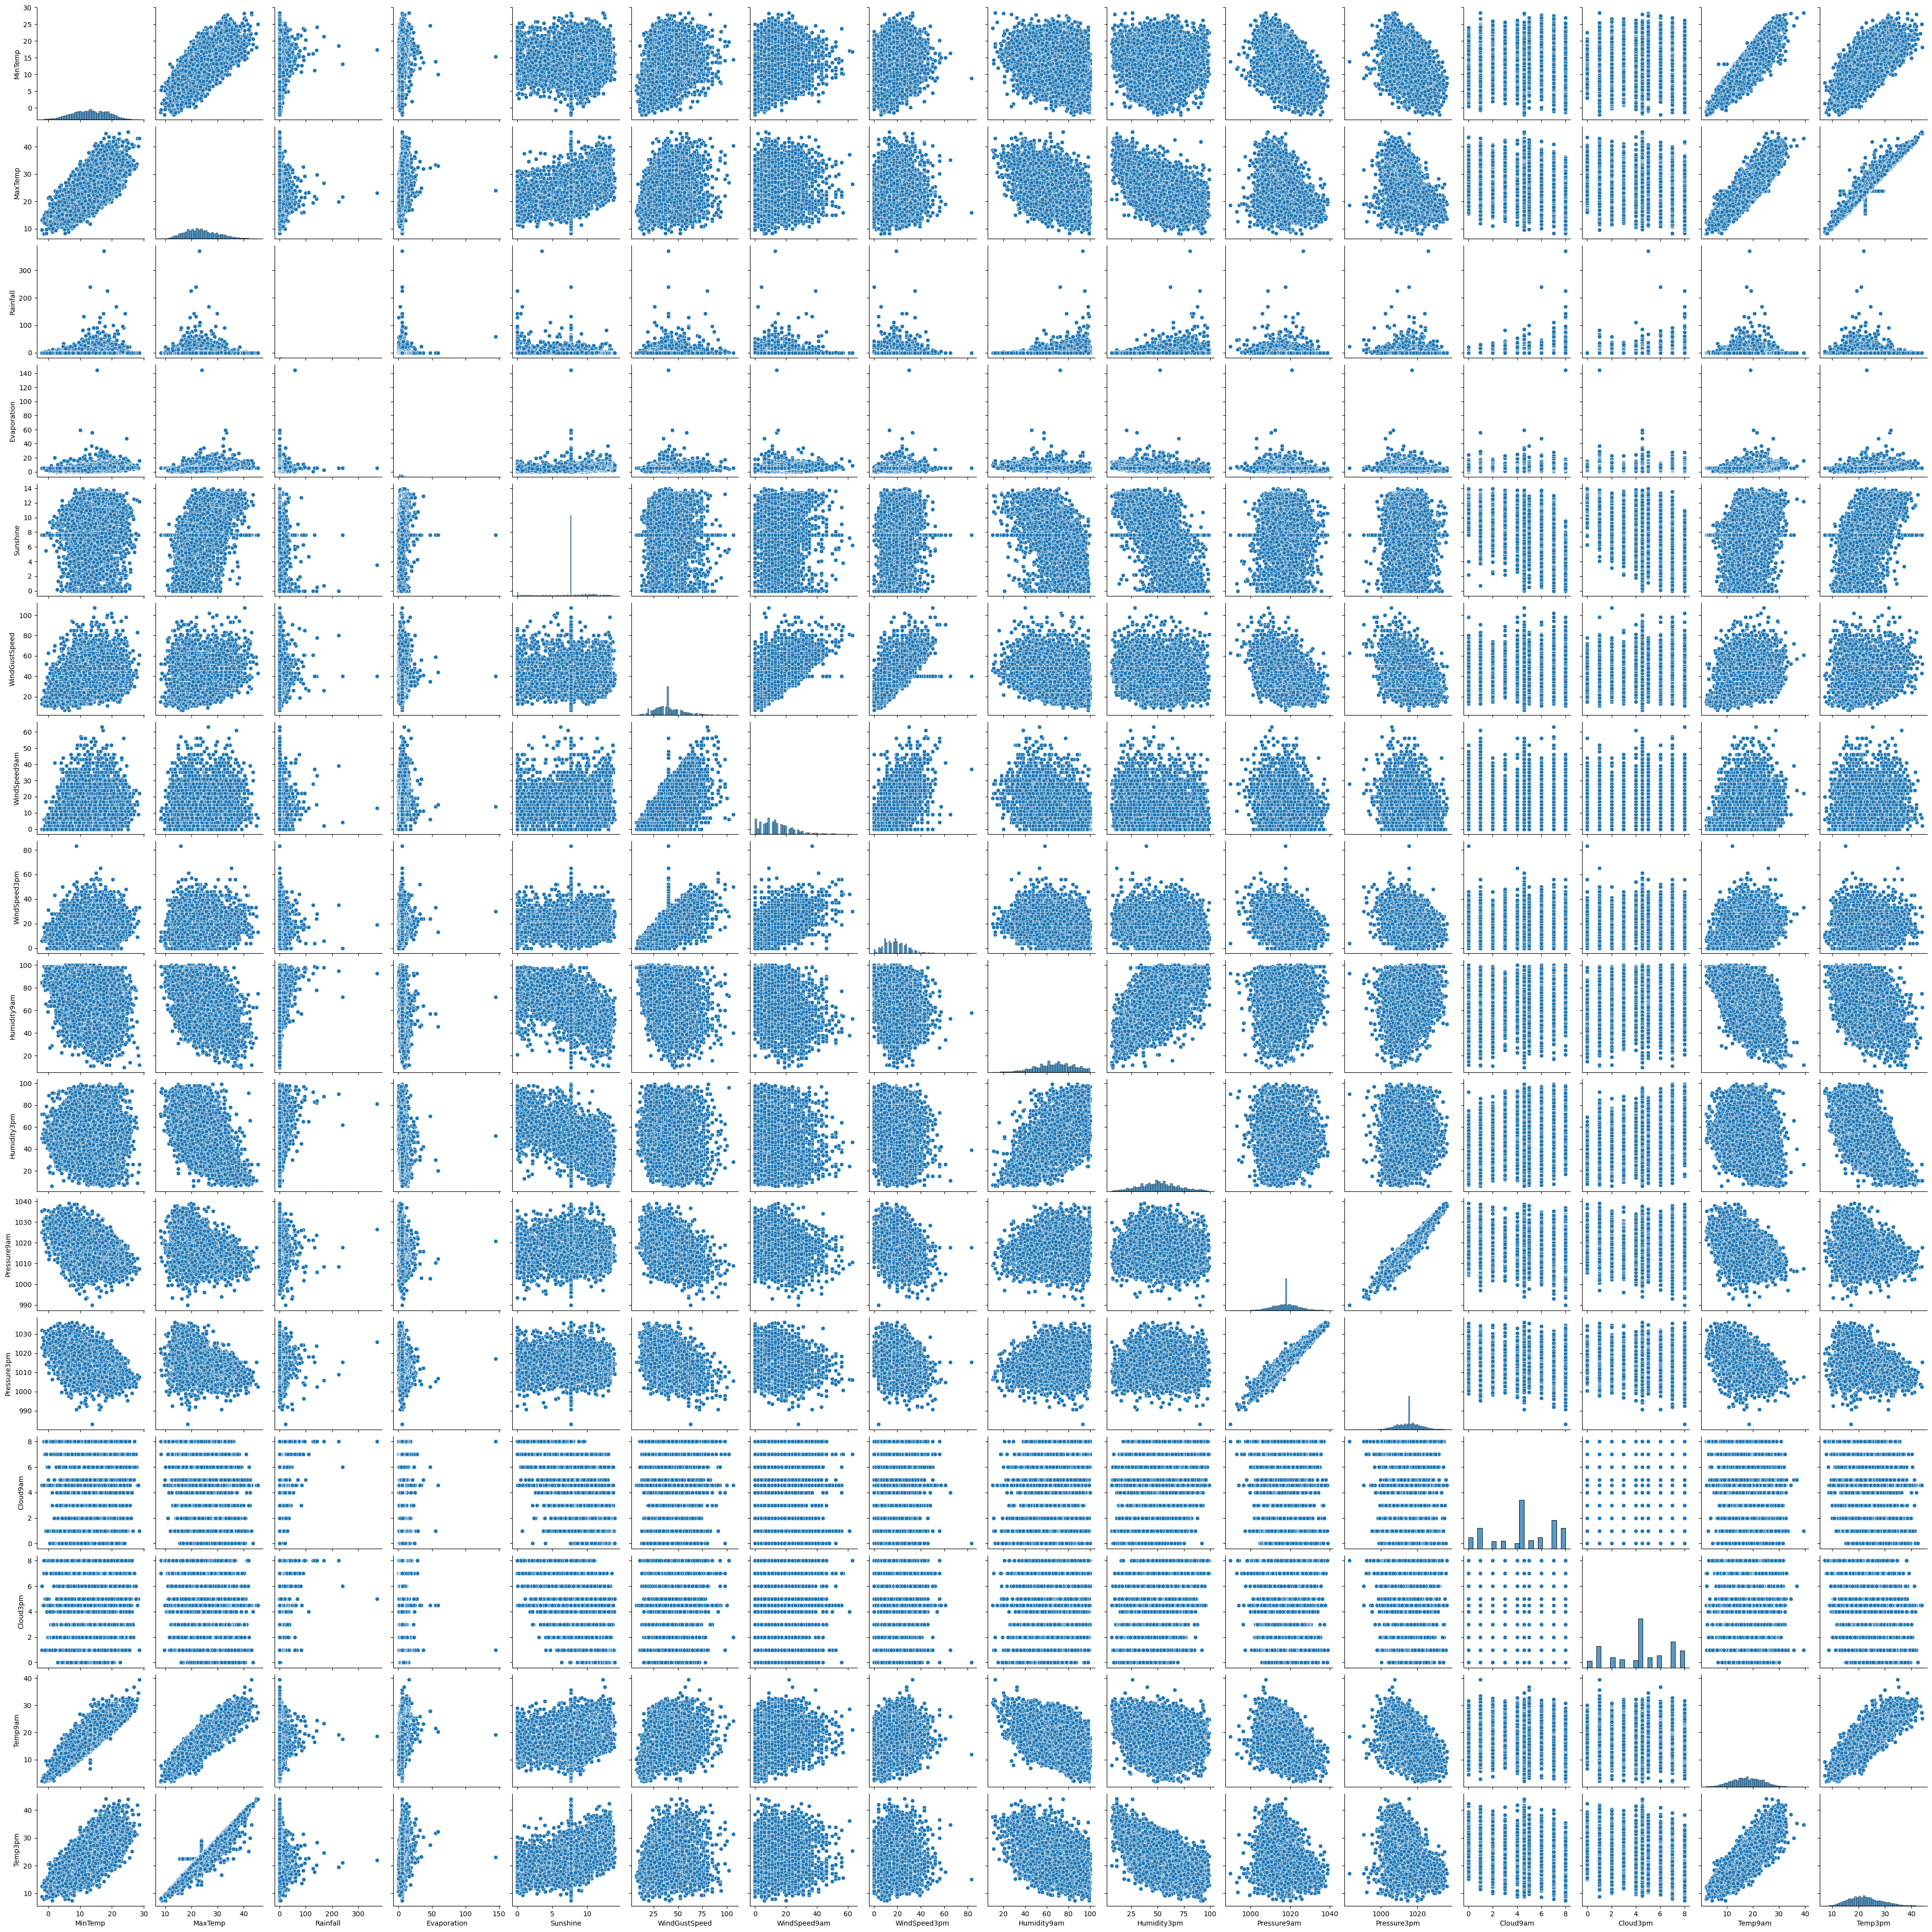

In [29]:
sns.pairplot(df)

# Outliers


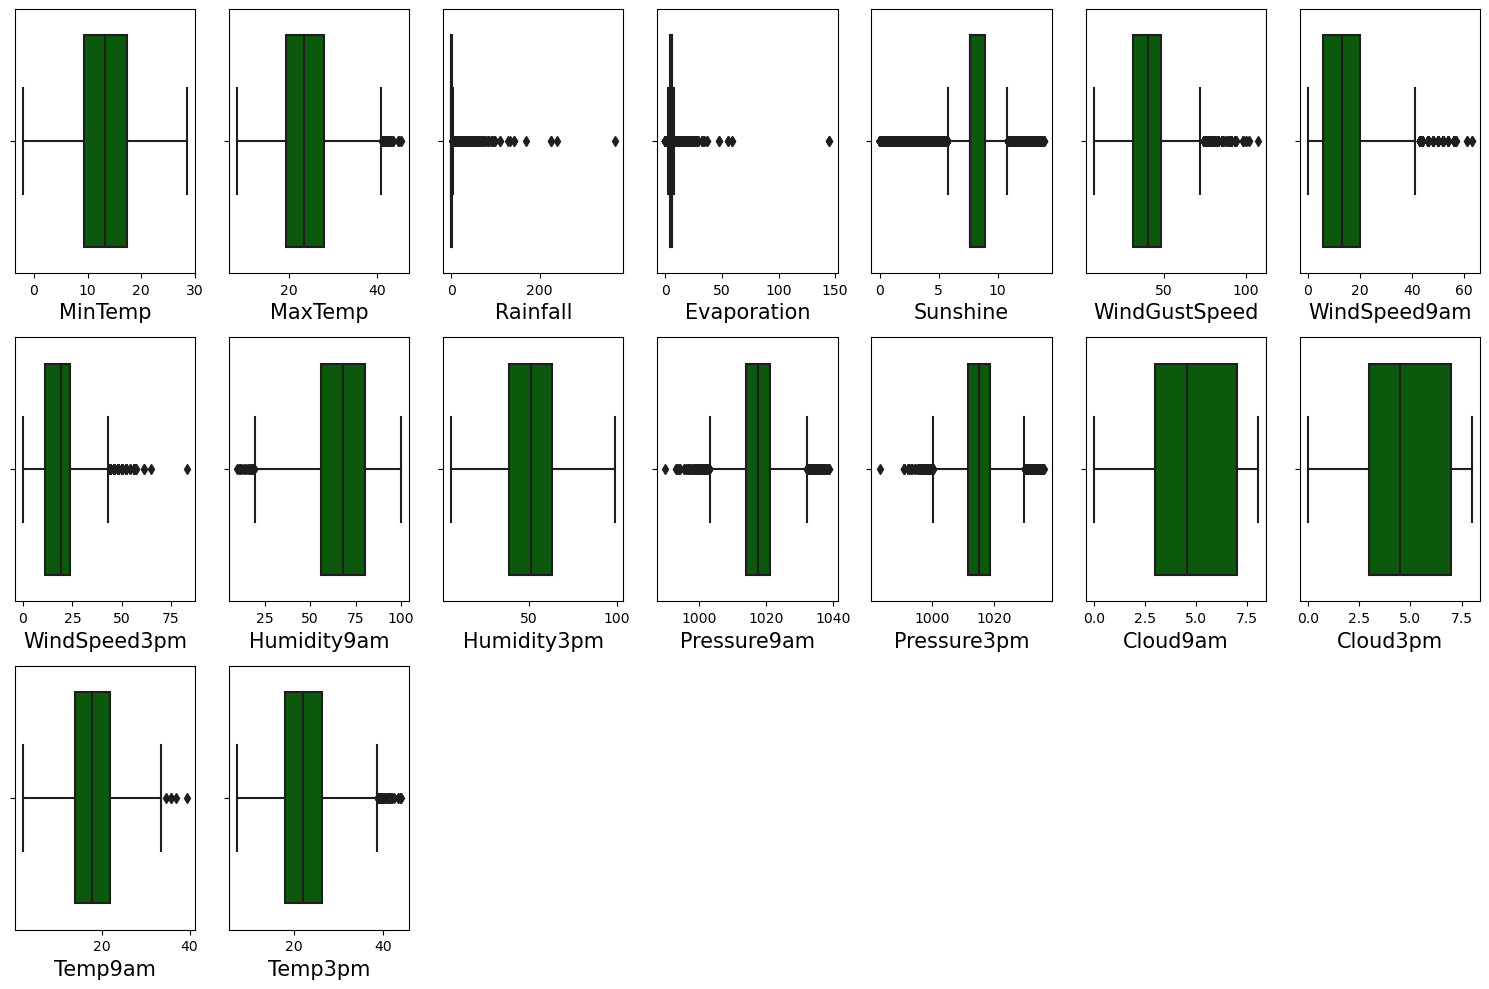

In [30]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column],color="darkgreen")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

It is clearly visible that there are outliers in features MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm


In [31]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(feature))
z

MaxTemp  Rainfall   Evaporation      Sunshine  WindGustSpeed  \
0     1.570089e-01  0.213986  2.305893e-16  1.257472e-15       0.277710   
1     2.028121e-01  0.272189  2.305893e-16  1.257472e-15       0.277710   
2     3.009450e-01  0.272189  2.305893e-16  1.257472e-15       0.422897   
3     6.771214e-01  0.272189  2.305893e-16  1.257472e-15       1.174166   
4     1.380408e+00  0.175183  2.305893e-16  1.257472e-15       0.059928   
...            ...       ...           ...           ...            ...   
8420  7.523137e-02  0.272189  2.305893e-16  1.257472e-15       0.666009   
8421  2.355231e-01  0.272189  2.305893e-16  1.257472e-15       1.319354   
8422  4.972110e-01  0.272189  2.305893e-16  1.257472e-15       0.230447   
8423  5.135665e-01  0.272189  2.305893e-16  1.257472e-15       0.883791   
8424  2.905320e-15  0.272189  2.305893e-16  1.257472e-15       0.000000   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Pressure9am  Pressure3pm  \
0         0.607461      0.563297     0.189439     1.584003     1.308665   
1         0.972321      0.357200     1.420268     1.121880     1.196072   
2         0.508725      0.769394     1.777981     1.599939     1.051309   
3         0.281166      0.982428     1.360650     0.006411     0.391836   
4         0.676112      0.151104     0.845246     1.090010     1.485596   
...            ...           ...          ...          ...          ...   
8420      0.083694      0.776331     1.002937     1.109058     0.814518   
8421      0.083694      0.982428     0.704843     0.933770     0.621501   
8422      0.478639      0.982428     0.883699     0.535388     0.251553   
8423      0.083694      1.188525     1.002937     0.280424     0.203299   
8424      0.311252      0.158041     0.347130     0.407906     0.428485   

       Temp9am   Temp3pm  
0     0.153712  0.108138  
1     0.100217  0.312348  
2     0.577390  0.127334  
3     0.060269  0.682376  
4     0.006773  1.220599  
...        ...       ...  
8420  1.366273  0.007221  
8421  1.223619  0.345987  
8422  0.938310  0.615099  
8423  0.474684  0.598279  
8424  0.492516  0.259513  

[8425 rows x 12 columns]

In [32]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  \
0     2008-12-01   Albury     13.4  22.900000       0.6     5.389395   
1     2008-12-02   Albury      7.4  25.100000       0.0     5.389395   
2     2008-12-03   Albury     12.9  25.700000       0.0     5.389395   
3     2008-12-04   Albury      9.2  28.000000       0.0     5.389395   
4     2008-12-05   Albury     17.5  32.300000       1.0     5.389395   
...          ...      ...      ...        ...       ...          ...   
8420  2017-06-21    Uluru      2.8  23.400000       0.0     5.389395   
8421  2017-06-22    Uluru      3.6  25.300000       0.0     5.389395   
8422  2017-06-23    Uluru      5.4  26.900000       0.0     5.389395   
8423  2017-06-24    Uluru      7.8  27.000000       0.0     5.389395   
8424  2017-06-25    Uluru     14.9  23.859976       0.0     5.389395   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0     7.632205           W      44.000000          W  ...        71.0   
1     7.632205         WNW      44.000000        NNW  ...        44.0   
2     7.632205         WSW      46.000000          W  ...        38.0   
3     7.632205          NE      24.000000         SE  ...        45.0   
4     7.632205           W      41.000000        ENE  ...        82.0   
...        ...         ...            ...        ...  ...         ...   
8420  7.632205           E      31.000000         SE  ...        51.0   
8421  7.632205         NNW      22.000000         SE  ...        56.0   
8422  7.632205           N      37.000000         SE  ...        53.0   
8423  7.632205          SE      28.000000        SSE  ...        51.0   
8424  7.632205           N      40.174469        ESE  ...        62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1            25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2            30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3            16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     10.1   
8421         21.0       1023.5       1019.1  4.566622  4.503183     10.9   
8422         24.0       1021.0       1016.8  4.566622  4.503183     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8         No            No  
1        24.3         No            No  
2        23.2         No            No  
3        26.5         No            No  
4        29.7         No            No  
...       ...        ...           ...  
8420     22.4         No            No  
8421     24.5         No            No  
8422     26.1         No            No  
8423     26.0         No            No  
8424     20.9         No            No  

[7987 rows x 23 columns]

In [34]:
#to drop Outliers;
print("old dataFrame",df.shape)
print("new dataFrame",df_new.shape)
print("total dropped rows",df.shape[0]-df_new.shape[0])

old dataFrame (8425, 23)
new dataFrame (7987, 23)
total dropped rows 438


# Percentage Data Loss

In [35]:
loss_percent=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print(loss_percent,'%')

5.198813056379822 %


# Correlation

In [36]:
df_new.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.718598  0.093118     0.372576  0.065682   
MaxTemp        0.718598  1.000000 -0.138415     0.468786  0.387050   
Rainfall       0.093118 -0.138415  1.000000    -0.095749 -0.166857   
Evaporation    0.372576  0.468786 -0.095749     1.000000  0.369080   
Sunshine       0.065682  0.387050 -0.166857     0.369080  1.000000   
WindGustSpeed  0.231097  0.136337  0.093945     0.200769  0.009797   
WindSpeed9am   0.144125  0.012153  0.056601     0.140171 -0.004618   
WindSpeed3pm   0.185976  0.093241  0.038229     0.105313  0.046531   
Humidity9am   -0.126383 -0.382687  0.297041    -0.325325 -0.366337   
Humidity3pm    0.090208 -0.409560  0.290501    -0.231465 -0.437504   
Pressure9am   -0.433113 -0.333569 -0.105009    -0.262043 -0.004078   
Pressure3pm   -0.427936 -0.414358 -0.043905    -0.275720 -0.063832   
Cloud9am       0.089354 -0.252579  0.224696    -0.116113 -0.527350   
Cloud3pm       0.036649 -0.248268  0.188755    -0.146421 -0.541996   
Temp9am        0.888690  0.864864 -0.033343     0.439628  0.261680   
Temp3pm        0.687570  0.974957 -0.146935     0.454352  0.403489   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.231097      0.144125      0.185976    -0.126383   
MaxTemp             0.136337      0.012153      0.093241    -0.382687   
Rainfall            0.093945      0.056601      0.038229     0.297041   
Evaporation         0.200769      0.140171      0.105313    -0.325325   
Sunshine            0.009797     -0.004618      0.046531    -0.366337   
WindGustSpeed       1.000000      0.577553      0.628452    -0.263933   
WindSpeed9am        0.577553      1.000000      0.548831    -0.359266   
WindSpeed3pm        0.628452      0.548831      1.000000    -0.244911   
Humidity9am        -0.263933     -0.359266     -0.244911     1.000000   
Humidity3pm        -0.085009     -0.107230     -0.080809     0.627507   
Pressure9am        -0.377284     -0.150346     -0.229929     0.131344   
Pressure3pm        -0.336132     -0.104918     -0.177395     0.162504   
Cloud9am            0.013678     -0.005043      0.004160     0.404493   
Cloud3pm            0.064375      0.043007     -0.002414     0.301372   
Temp9am             0.198936      0.109028      0.190467    -0.369380   
Temp3pm             0.101786     -0.002336      0.071548    -0.376383   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.090208    -0.433113    -0.427936  0.089354  0.036649   
MaxTemp          -0.409560    -0.333569    -0.414358 -0.252579 -0.248268   
Rainfall          0.290501    -0.105009    -0.043905  0.224696  0.188755   
Evaporation      -0.231465    -0.262043    -0.275720 -0.116113 -0.146421   
Sunshine         -0.437504    -0.004078    -0.063832 -0.527350 -0.541996   
WindGustSpeed    -0.085009    -0.377284    -0.336132  0.013678  0.064375   
WindSpeed9am     -0.107230    -0.150346    -0.104918 -0.005043  0.043007   
WindSpeed3pm     -0.080809    -0.229929    -0.177395  0.004160 -0.002414   
Humidity9am       0.627507     0.131344     0.162504  0.404493  0.301372   
Humidity3pm       1.000000    -0.008187     0.062125  0.416441  0.437228   
Pressure9am      -0.008187     1.000000     0.960079 -0.061322 -0.069925   
Pressure3pm       0.062125     0.960079     1.000000 -0.002107 -0.014624   
Cloud9am          0.416441    -0.061322    -0.002107  1.000000  0.570442   
Cloud3pm          0.437228    -0.069925    -0.014624  0.570442  1.000000   
Temp9am          -0.115275    -0.412416    -0.442529 -0.137649 -0.127397   
Temp3pm          -0.478797    -0.293258    -0.382657 -0.266713 -0.290356   

                Temp9am   Temp3pm  
MinTemp        0.888690  0.687570  
MaxTemp        0.864864  0.974957  
Rainfall      -0.033343 -0.146935  
Evaporation    0.439628  0.454352  
Sunshine       0.261680  0.403489  
WindGustSpeed  0.198936  0.101786  
WindSpeed9am   0.109028 -0.002336  
Wi

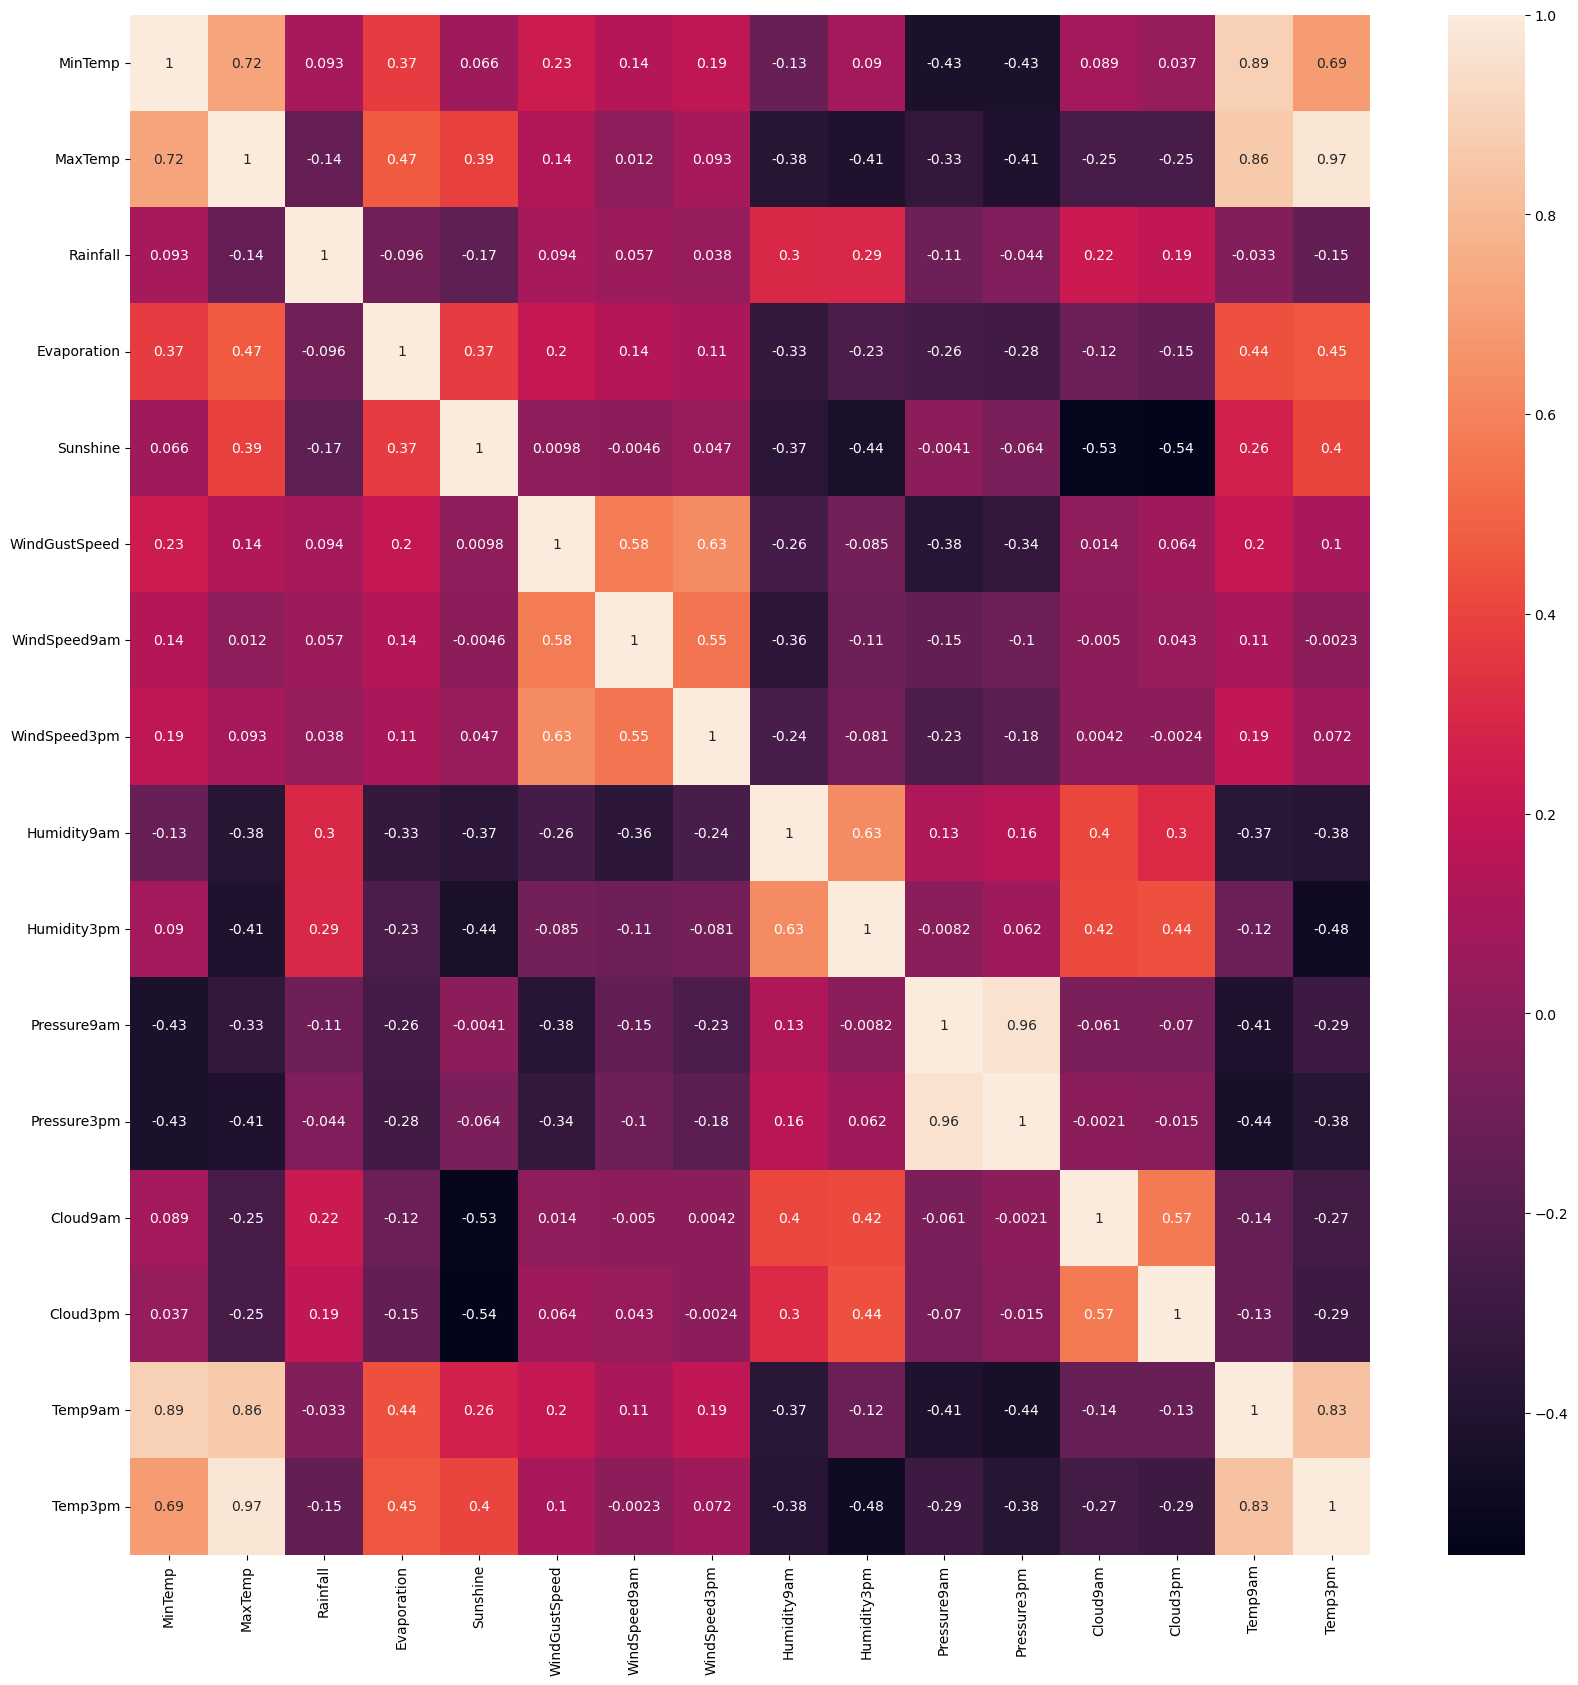

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

MaxTemp and MinTemp, Pressure9am and pressure3pm, Temp9am and Temp3pm, Evaporation and MaxTemp, MaxTemp and Temp3pm have a strong positive correlation with each other.

We can see negative correlation between Temp9am and Humidity9am,Temp3pm and Humidity3pm,Temp3pm and Pressure3pm,Temp9apm and Pressure9am,Sunshine and Cloud3pm,Sunshine and Cloud9am,Sunshine and Humidity3pm,Sunshine and Humidity9am,MinTemp and Pressure3pm,MinTemp and Pressure9am.

# Skewness

In [38]:
df_new.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  7987.000000  7987.000000  7987.000000  7987.000000  7987.000000   
mean     13.096246    23.775009     1.938509     5.134497     7.669640   
std       5.381889     6.004614     4.745302     2.307254     2.799213   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.100000    19.300000     0.000000     3.800000     7.632205   
50%      13.193305    23.300000     0.000000     5.389395     7.632205   
75%      17.200000    27.900000     1.200000     5.389395     9.000000   
max      28.300000    42.000000    33.400000    16.600000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7987.000000   7987.000000   7987.000000  7987.000000  7987.000000   
mean       39.344773     13.291516     18.106052    67.967263    51.278074   
std        12.786265      9.410848      9.237693    16.472276    18.027564   
min         7.000000      0.000000      0.000000    18.000000     6.000000   
25%        31.000000      6.000000     11.000000    57.000000    39.000000   
50%        39.000000     11.000000     18.533662    68.000000    51.000000   
75%        46.000000     19.000000     24.000000    80.000000    63.000000   
max        81.000000     44.000000     46.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7987.000000  7987.000000  7987.000000  7987.000000  7987.000000   
mean   1017.794155  1015.384942     4.538028     4.473005    17.669422   
std       5.983365     5.926165     2.429018     2.297065     5.571857   
min     999.000000   996.700000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.700000     3.000000     3.000000    13.700000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.400000  1018.900000     7.000000     6.000000    21.800000   
max    1036.300000  1033.800000     8.000000     8.000000    34.500000   

           Temp3pm  
count  7987.000000  
mean     22.375438  
std       5.836843  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.200000  
max      40.100000

In [39]:
df_new.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

As we can see skewness in Rainfall,Evaporation,Sunshine,WindGustSpeed and WindSpeed9am, let's remove it using log transformation.

In [40]:
df_new["Rainfall"] = np.log1p(df_new["Rainfall"])
df_new["Evaporation"] = np.log1p(df_new["Evaporation"])
df_new["Sunshine"] = np.log1p(df_new["Sunshine"])
df_new["WindGustSpeed"] = np.log1p(df_new["WindGustSpeed"])
df_new["WindSpeed9am"] = np.log1p(df_new["WindSpeed9am"])


# Encoder

In [41]:
le=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(le.fit_transform)
df_new

Date  Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4  22.900000  0.470004      1.85464    2.1555   
1        1         1      7.4  25.100000  0.000000      1.85464    2.1555   
2        2         1     12.9  25.700000  0.000000      1.85464    2.1555   
3        3         1      9.2  28.000000  0.000000      1.85464    2.1555   
4        4         1     17.5  32.300000  0.693147      1.85464    2.1555   
...    ...       ...      ...        ...       ...          ...       ...   
8420  2931         9      2.8  23.400000  0.000000      1.85464    2.1555   
8421  2932         9      3.6  25.300000  0.000000      1.85464    2.1555   
8422  2933         9      5.4  26.900000  0.000000      1.85464    2.1555   
8423  2934         9      7.8  27.000000  0.000000      1.85464    2.1555   
8424  2935         9     14.9  23.859976  0.000000      1.85464    2.1555   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0              13       3.806662          13  ...         71.0         22.0   
1              14       3.806662           6  ...         44.0         25.0   
2              15       3.850148          13  ...         38.0         30.0   
3               4       3.218876           9  ...         45.0         16.0   
4              13       3.737670           1  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420            0       3.465736           9  ...         51.0         24.0   
8421            6       3.135494           9  ...         56.0         21.0   
8422            3       3.637586           9  ...         53.0         24.0   
8423            9       3.367296          10  ...         51.0         24.0   
8424            3       3.717818           2  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
8420          0             0  
8421          0             0  
8422          0             0  
8423          0             0  
8424          0             0  

[7987 rows x 23 columns]

# i) Rain Tomorrow

In [42]:
x = df_new.drop("RainTomorrow", axis=1)
y = df_new["RainTomorrow"]

In [43]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.530550 -1.508427  0.056444 -0.145732 -0.045414       0.2832  0.169416   
1    -1.529355 -1.508427 -1.058476  0.220676 -0.582854       0.2832  0.169416   
2    -1.528159 -1.508427 -0.036466  0.320605 -0.582854       0.2832  0.169416   
3    -1.526963 -1.508427 -0.724000  0.703668 -0.582854       0.2832  0.169416   
4    -1.525768 -1.508427  0.818306  1.419829  0.209747       0.2832  0.169416   
...        ...       ...       ...       ...       ...          ...       ...   
7982  1.974004  1.029423 -1.913248 -0.062457 -0.582854       0.2832  0.169416   
7983  1.975200  1.029423 -1.764592  0.253986 -0.582854       0.2832  0.169416   
7984  1.976395  1.029423 -1.430116  0.520464 -0.582854       0.2832  0.169416   
7985  1.977591  1.029423 -0.984148  0.537119 -0.582854       0.2832  0.169416   
7986  1.978787  1.029423  0.335174  0.014151 -0.582854       0.2832  0.169416   

      WindGustDir  WindGustSpeed  WindDir9am  ...  WindSpeed3pm  Humidity9am  \
0        1.229267       0.485042    1.250245  ...      0.638072     0.184123   
1        1.441960       0.485042   -0.277857  ...      0.421555    -1.455097   
2        1.654654       0.615247    1.250245  ...      0.854590    -1.819368   
3       -0.684977      -1.274926    0.377044  ...     -0.985811    -1.394385   
4        1.229267       0.278462   -1.369358  ...      0.205037     0.851954   
...           ...            ...         ...  ...           ...          ...   
7982    -1.535751      -0.535770    0.377044  ...     -0.769293    -1.030114   
7983    -0.259589      -1.524590    0.377044  ...     -0.985811    -0.726555   
7984    -0.897670      -0.021211    0.377044  ...     -0.985811    -0.908690   
7985     0.378492      -0.830522    0.595344  ...     -1.202329    -1.030114   
7986    -0.897670       0.219023   -1.151057  ...     -0.119740    -0.362284   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.624174    -1.687142    -1.398115  1.425345  0.013138 -0.138099   
1       -1.457752    -1.202435    -1.279988  0.011773  0.013138 -0.084254   
2       -1.180382    -1.703856    -1.128109  0.011773 -1.076661  0.597788   
3       -1.957019    -0.032451    -0.436219  0.011773  0.013138  0.077282   
4       -1.013959    -1.169007    -1.583744  1.013630  1.535531  0.023437   
...           ...          ...          ...       ...       ...       ...   
7982    -1.513226     1.137532     0.829435  0.011773  0.013138 -1.358595   
7983    -1.679648     0.953678     0.626930  0.011773  0.013138 -1.215007   
7984    -1.513226     0.535827     0.238796  0.011773  0.013138 -0.927832   
7985    -1.513226     0.268402     0.188170 -0.633229 -1.076661 -0.461172   
7986    -0.847537     0.402114     0.424426  1.425345  1.535531 -0.479120   

       Temp3pm  RainToday  
0    -0.098593  -0.542476  
1     0.329747  -0.542476  
2     0.141277  -0.542476  
3     0.706687  -0.542476  
4     1.254963  -0.542476  
...        ...        ...  
7982  0.004208  -0.542476  
7983  0.364014  -0.542476  
7984  0.638152  -0.542476  
7985  0.621019  -0.542476  
7986 -0.252796  -0.542476  

[7987 rows x 22 columns]

# VIF

In [44]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.490117           Date
1     1.556362       Location
2     8.499118        MinTemp
3    26.265578        MaxTemp
4     4.390330       Rainfall
5     1.505509    Evaporation
6     1.633237       Sunshine
7     1.620792    WindGustDir
8     2.151107  WindGustSpeed
9     1.396297     WindDir9am
10    1.490720     WindDir3pm
11    1.815577   WindSpeed9am
12    1.960783   WindSpeed3pm
13    3.962031    Humidity9am
14    5.374538    Humidity3pm
15   20.000566    Pressure9am
16   19.077386    Pressure3pm
17    1.865075       Cloud9am
18    1.743948       Cloud3pm
19   17.124155        Temp9am
20   32.846631        Temp3pm
21    4.199036      RainToday

We can see that we have high multicolinearity in features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [45]:
#dropping Temp3pm
x.drop("Temp3pm",axis=1,inplace=True)

In [46]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.490099           Date
1     1.553864       Location
2     8.434345        MinTemp
3     9.557162        MaxTemp
4     4.389296       Rainfall
5     1.503858    Evaporation
6     1.632344       Sunshine
7     1.617789    WindGustDir
8     2.142088  WindGustSpeed
9     1.395711     WindDir9am
10    1.489988     WindDir3pm
11    1.815156   WindSpeed9am
12    1.957788   WindSpeed3pm
13    3.506661    Humidity9am
14    3.659371    Humidity3pm
15   19.429364    Pressure9am
16   18.613030    Pressure3pm
17    1.864783       Cloud9am
18    1.732791       Cloud3pm
19   15.869535        Temp9am
20    4.196602      RainToday

We still can see high vif value in Pressure9am,Pressure3pm and Temp9am.

In [47]:
#Let's remove Pressure9am
x.drop("Pressure9am",axis=1,inplace=True)

In [48]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.487549           Date
1     1.553705       Location
2     8.282822        MinTemp
3     9.152922        MaxTemp
4     4.365870       Rainfall
5     1.491536    Evaporation
6     1.632009       Sunshine
7     1.602810    WindGustDir
8     2.124132  WindGustSpeed
9     1.372385     WindDir9am
10    1.423122     WindDir3pm
11    1.805259   WindSpeed9am
12    1.941708   WindSpeed3pm
13    3.506643    Humidity9am
14    3.657498    Humidity3pm
15    1.421891    Pressure3pm
16    1.864730       Cloud9am
17    1.729410       Cloud3pm
18   15.830452        Temp9am
19    4.196436      RainToday

In [49]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [50]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values       Features
0     1.459559           Date
1     1.552872       Location
2     4.408988        MinTemp
3     5.347106        MaxTemp
4     4.365802       Rainfall
5     1.486289    Evaporation
6     1.627301       Sunshine
7     1.600943    WindGustDir
8     2.087140  WindGustSpeed
9     1.372075     WindDir9am
10    1.422643     WindDir3pm
11    1.795581   WindSpeed9am
12    1.903842   WindSpeed3pm
13    2.467881    Humidity9am
14    2.881941    Humidity3pm
15    1.418513    Pressure3pm
16    1.843678       Cloud9am
17    1.723920       Cloud3pm
18    4.193741      RainToday

Now we can see that there is no multi-colinearity in the dataset.

In [51]:
pd.DataFrame(x).columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')

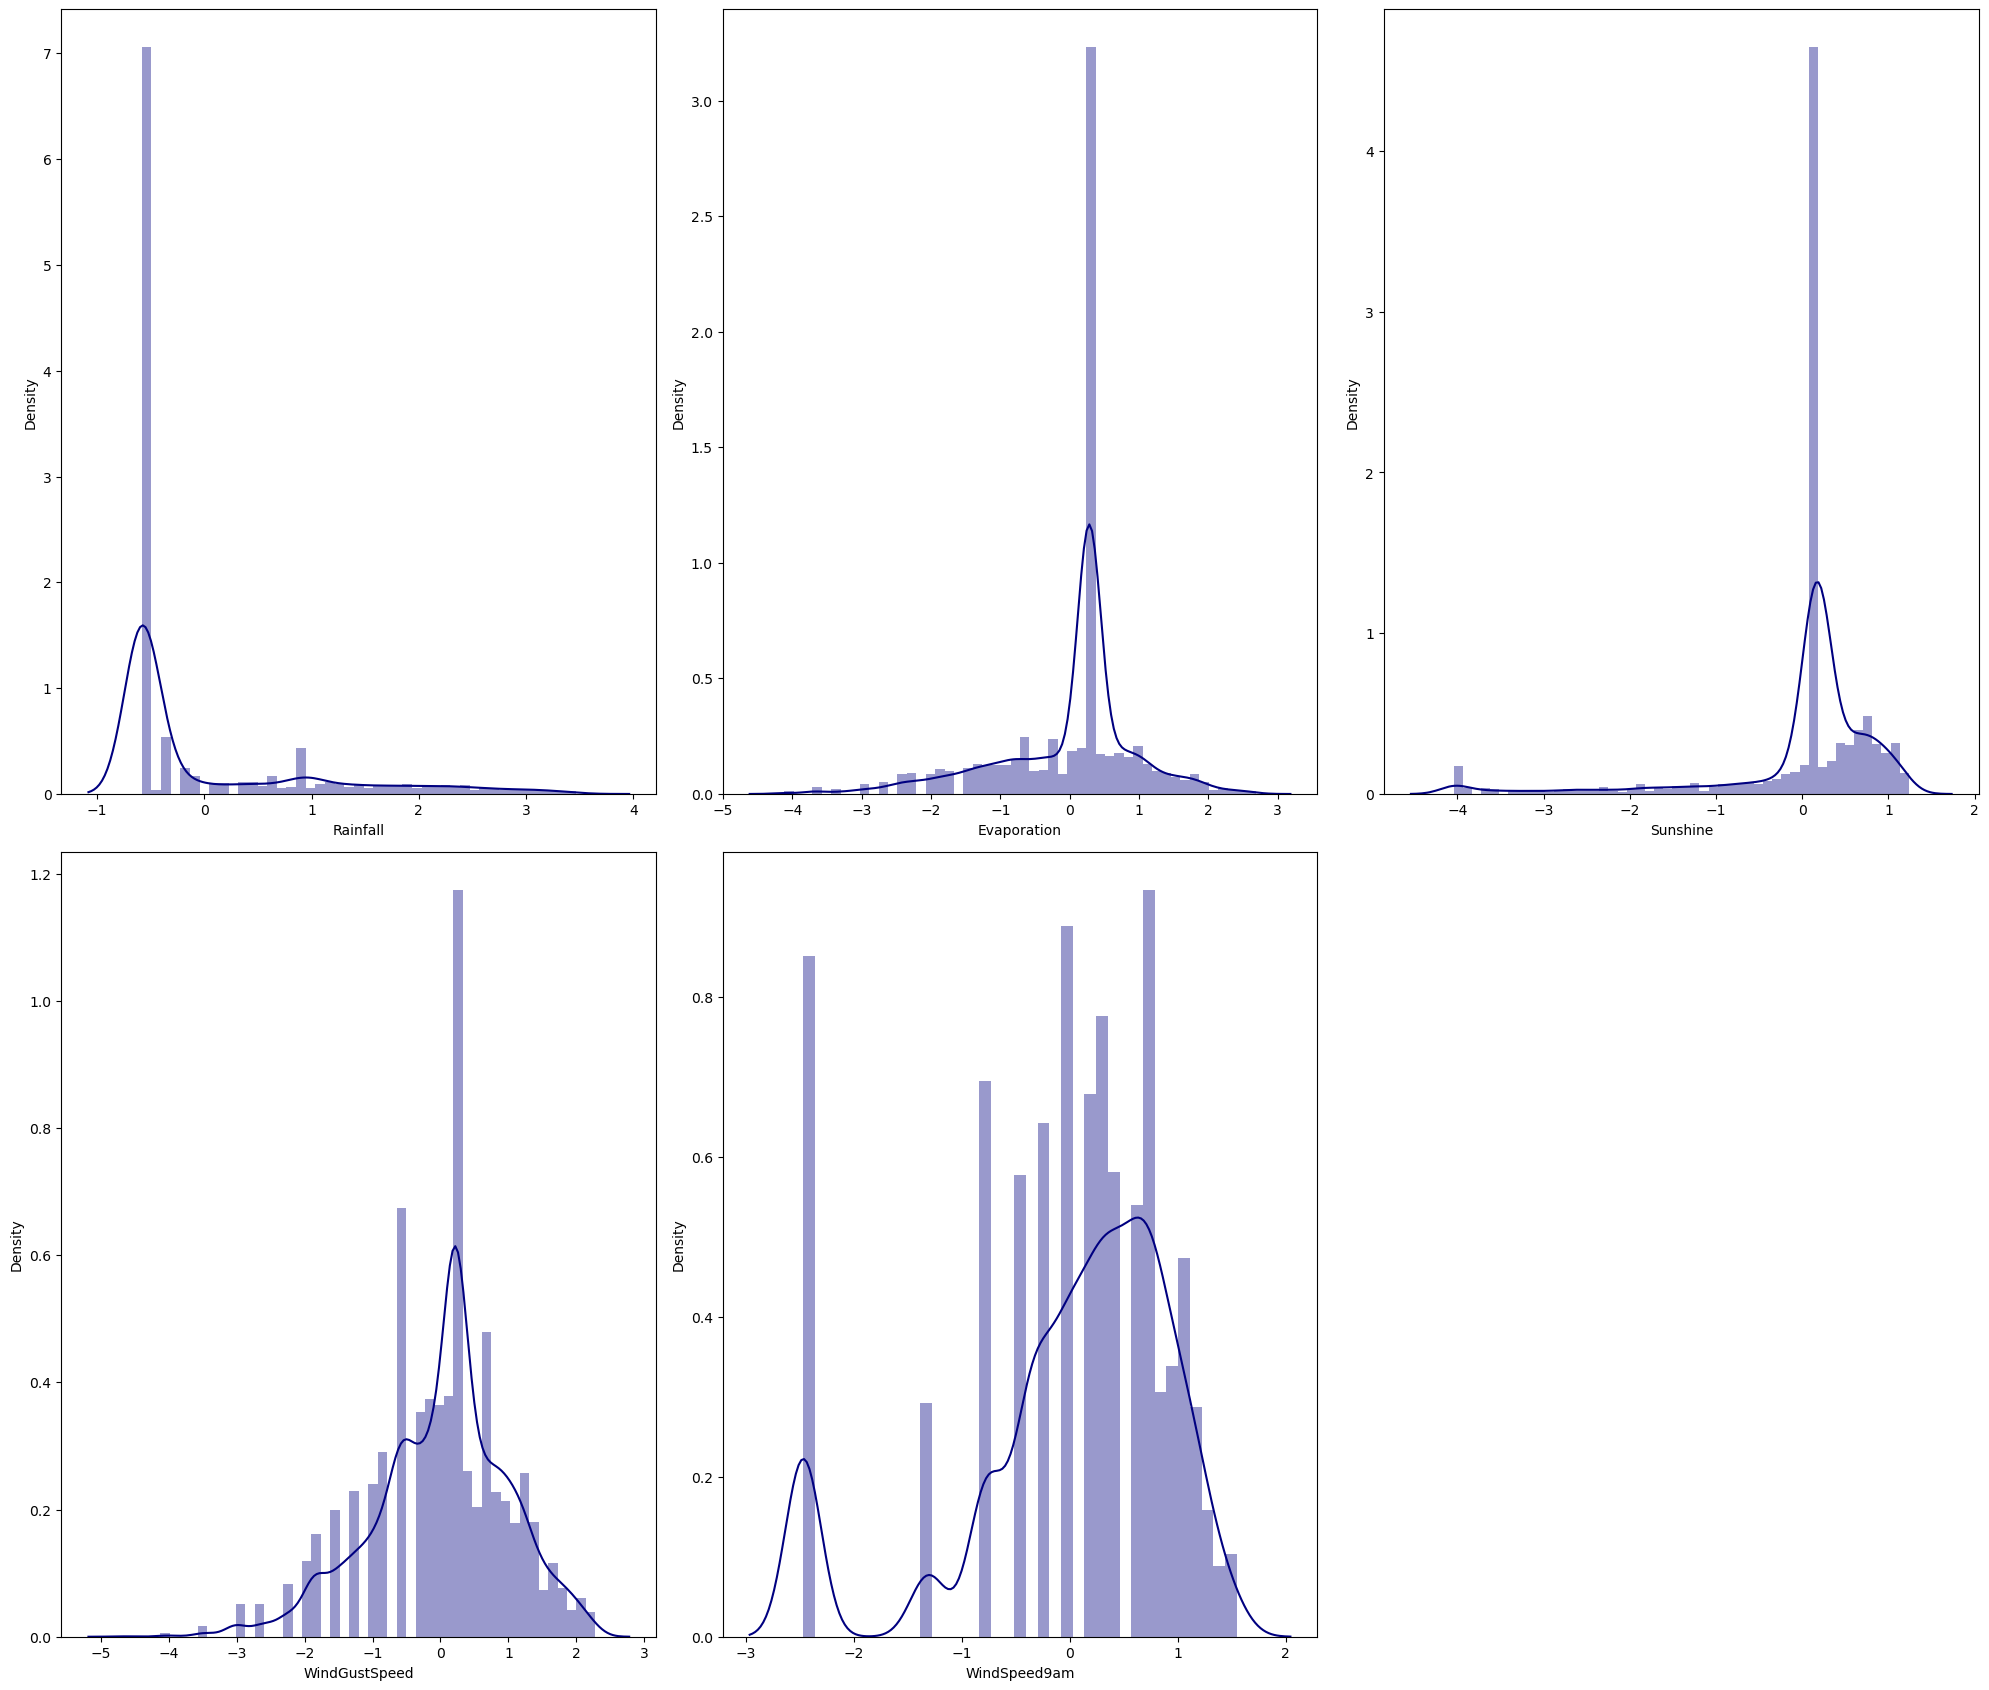

In [52]:
plt.figure(figsize=(20,25),facecolor='white')
col=["Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am"]
plotnumber=1
for column in col:
    if plotnumber<=20:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color="navy")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Skewness is also removed.

# Oversampling

In [53]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see data is not balanced, lets fix this usin g SMOTE

In [54]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [55]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Now we can see that the data is balanced. Hence we can proceed with the model.

# Finding the best random state

In [56]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9424168694241687  on Random_state  10


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression()
0.781021897810219
[[1426  392]
 [ 418 1463]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1818
           1       0.79      0.78      0.78      1881

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699

Cross Validation Score: 0.7158150851581507
Difference Between Accuracy Score and CrossValidation Score: 0.06520681265206829


Accuracy score: of SVC()
0.8594214652608814
[[1515  303]
 [ 217 1664]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1818
           1       0.85      0.88      0.86      1881

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699

Cross Validation Score: 0.7302514193025142
Difference Between Ac

We can see Random Forest Classifier is performing better than other models.

# Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

parameters = {'max_depth': np.arange(8,20), 
              'max_features': ['sqrt','auto', 'log2'], 
              'n_estimators': [92,95,97,98,100,102,105,107,109],
              'criterion' :['gini','entropy','log_loss'] }

grid_rf = GridSearchCV(rf, param_grid = parameters, cv = 5)
grid_rf.fit(x,y)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'n_estimators': 98}
0.7969991889699919


In [61]:
rf1=RandomForestClassifier(max_features ='log2', max_depth= 17,criterion= 'entropy',n_estimators=105)
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print('Accuracy score: of',rf1)
acc=accuracy_score(y_test,predrf1)
print(acc)
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

Accuracy score: of RandomForestClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       n_estimators=105)
0.936198972695323
[[1685  133]
 [ 103 1778]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1818
           1       0.93      0.95      0.94      1881

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



# ROC AUC

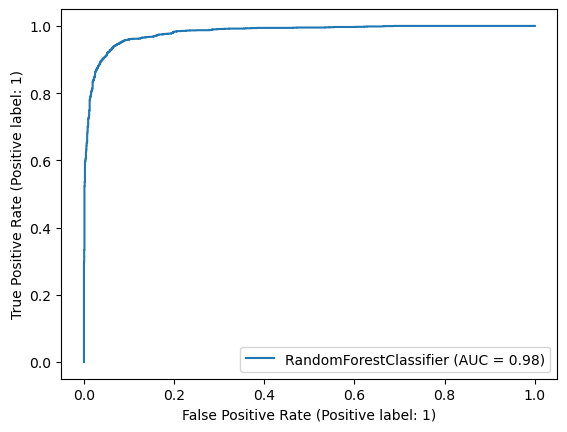

In [62]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf1,x_test,y_test)
#plot_roc_curve(rf1, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix

plt.show()

The score is good, we can save the model.

In [63]:
# Saving the model using .pkl
import pickle
filename='Rain_Tomorrow.pkl'
pickle.dump(rf1,open(filename,'wb'))

# Conclusion

In [64]:
import numpy as np
a=np.array(y_test)
df_com=pd.DataFrame({"original":a,"Predicted":predrf1},index=range(len(a)))
df_com.sample(5)

original  Predicted
1276         1          1
3361         0          0
3106         1          1
2689         1          1
3683         0          1

# ii) Rainfall

In [65]:
df_new.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     0         1     13.4     22.9  0.470004      1.85464    2.1555   
1     1         1      7.4     25.1  0.000000      1.85464    2.1555   
2     2         1     12.9     25.7  0.000000      1.85464    2.1555   
3     3         1      9.2     28.0  0.000000      1.85464    2.1555   
4     4         1     17.5     32.3  0.693147      1.85464    2.1555   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13       3.806662          13  ...         71.0         22.0   
1           14       3.806662           6  ...         44.0         25.0   
2           15       3.850148          13  ...         38.0         30.0   
3            4       3.218876           9  ...         45.0         16.0   
4           13       3.737670           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8          0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3          0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2          0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5          0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [66]:
x = df_new.drop("Rainfall", axis=1)
y = df_new["Rainfall"]

In [67]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Date  Location   MinTemp   MaxTemp  Evaporation  Sunshine  \
0    -1.530550 -1.508427  0.056444 -0.145732       0.2832  0.169416   
1    -1.529355 -1.508427 -1.058476  0.220676       0.2832  0.169416   
2    -1.528159 -1.508427 -0.036466  0.320605       0.2832  0.169416   
3    -1.526963 -1.508427 -0.724000  0.703668       0.2832  0.169416   
4    -1.525768 -1.508427  0.818306  1.419829       0.2832  0.169416   
...        ...       ...       ...       ...          ...       ...   
7982  1.974004  1.029423 -1.913248 -0.062457       0.2832  0.169416   
7983  1.975200  1.029423 -1.764592  0.253986       0.2832  0.169416   
7984  1.976395  1.029423 -1.430116  0.520464       0.2832  0.169416   
7985  1.977591  1.029423 -0.984148  0.537119       0.2832  0.169416   
7986  1.978787  1.029423  0.335174  0.014151       0.2832  0.169416   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0        1.229267       0.485042    1.250245    1.400214  ...     0.184123   
1        1.441960       0.485042   -0.277857    1.626597  ...    -1.455097   
2        1.654654       0.615247    1.250245    1.626597  ...    -1.819368   
3       -0.684977      -1.274926    0.377044   -1.769138  ...    -1.394385   
4        1.229267       0.278462   -1.369358   -0.184462  ...     0.851954   
...           ...            ...         ...         ...  ...          ...   
7982    -1.535751      -0.535770    0.377044   -1.542755  ...    -1.030114   
7983    -0.259589      -1.524590    0.377044   -1.089991  ...    -0.726555   
7984    -0.897670      -0.021211    0.377044    1.400214  ...    -0.908690   
7985     0.378492      -0.830522    0.595344   -1.089991  ...    -1.030114   
7986    -0.897670       0.219023   -1.151057   -1.316373  ...    -0.362284   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.624174    -1.687142    -1.398115  1.425345  0.013138 -0.138099   
1       -1.457752    -1.202435    -1.279988  0.011773  0.013138 -0.084254   
2       -1.180382    -1.703856    -1.128109  0.011773 -1.076661  0.597788   
3       -1.957019    -0.032451    -0.436219  0.011773  0.013138  0.077282   
4       -1.013959    -1.169007    -1.583744  1.013630  1.535531  0.023437   
...           ...          ...          ...       ...       ...       ...   
7982    -1.513226     1.137532     0.829435  0.011773  0.013138 -1.358595   
7983    -1.679648     0.953678     0.626930  0.011773  0.013138 -1.215007   
7984    -1.513226     0.535827     0.238796  0.011773  0.013138 -0.927832   
7985    -1.513226     0.268402     0.188170 -0.633229 -1.076661 -0.461172   
7986    -0.847537     0.402114     0.424426  1.425345  1.535531 -0.479120   

       Temp3pm  RainToday  RainTomorrow  
0    -0.098593  -0.542476     -0.543635  
1     0.329747  -0.542476     -0.543635  
2     0.141277  -0.542476     -0.543635  
3     0.706687  -0.542476     -0.543635  
4     1.254963  -0.542476     -0.543635  
...        ...        ...           ...  
7982  0.004208  -0.542476     -0.543635  
7983  0.364014  -0.542476     -0.543635  
7984  0.638152  -0.542476     -0.543635  
7985  0.621019  -0.542476     -0.543635  
7986 -0.252796  -0.542476     -0.543635  

[7987 rows x 22 columns]

# VIF

In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(pd.DataFrame(x).values,i) for i in range(pd.DataFrame(x).shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()   

    VIF Factor       features
0     1.490948           Date
1     1.566237       Location
2     8.502192        MinTemp
3    26.276928        MaxTemp
4     1.504585    Evaporation
5     1.647354       Sunshine
6     1.623061    WindGustDir
7     2.209526  WindGustSpeed
8     1.396157     WindDir9am
9     1.492734     WindDir3pm
10    1.815162   WindSpeed9am
11    1.964366   WindSpeed3pm
12    3.926729    Humidity9am
13    5.611639    Humidity3pm
14   19.929349    Pressure9am
15   19.087017    Pressure3pm
16    1.864584       Cloud9am
17    1.759665       Cloud3pm
18   17.125873        Temp9am
19   32.838962        Temp3pm
20    1.361416      RainToday
21    1.433189   RainTomorrow


We can see high VIF value in MaxTemp,Pressure9am,Pressure3pm,Temp9am,Temp3pm.

In [69]:
# Dropping MaxTemp column
x.drop("MaxTemp",axis=1,inplace=True)

In [70]:
vif_calc()   

    VIF Factor       features
0     1.490835           Date
1     1.563369       Location
2     8.482611        MinTemp
3     1.501828    Evaporation
4     1.641052       Sunshine
5     1.622458    WindGustDir
6     2.199199  WindGustSpeed
7     1.393709     WindDir9am
8     1.491694     WindDir3pm
9     1.814356   WindSpeed9am
10    1.964004   WindSpeed3pm
11    3.907816    Humidity9am
12    5.521631    Humidity3pm
13   19.926324    Pressure9am
14   19.085395    Pressure3pm
15    1.859333       Cloud9am
16    1.741933       Cloud3pm
17   16.707059        Temp9am
18   11.967288        Temp3pm
19    1.356335      RainToday
20    1.431983   RainTomorrow


We can still see high VIF value in Pressure9am,Pressure3pm,Temp9am,Temp3pm.

In [71]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [72]:
vif_calc()   

    VIF Factor       features
0     1.489005           Date
1     1.563182       Location
2     8.299398        MinTemp
3     1.488531    Evaporation
4     1.640271       Sunshine
5     1.609290    WindGustDir
6     2.180841  WindGustSpeed
7     1.372131     WindDir9am
8     1.429365     WindDir3pm
9     1.805083   WindSpeed9am
10    1.951256   WindSpeed3pm
11    3.892778    Humidity9am
12    5.465080    Humidity3pm
13    1.425898    Pressure3pm
14    1.859323       Cloud9am
15    1.739799       Cloud3pm
16   16.555237        Temp9am
17   11.143114        Temp3pm
18    1.343849      RainToday
19    1.429148   RainTomorrow


In [ ]:
We can see high VIF value in Temp9am,Temp3pm.

In [73]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [74]:
vif_calc()   

    VIF Factor       features
0     1.462770           Date
1     1.563151       Location
2     4.866619        MinTemp
3     1.483952    Evaporation
4     1.633066       Sunshine
5     1.604830    WindGustDir
6     2.162114  WindGustSpeed
7     1.371630     WindDir9am
8     1.429361     WindDir3pm
9     1.795251   WindSpeed9am
10    1.908685   WindSpeed3pm
11    2.469440    Humidity9am
12    3.892560    Humidity3pm
13    1.419335    Pressure3pm
14    1.834339       Cloud9am
15    1.739431       Cloud3pm
16    6.227996        Temp3pm
17    1.340315      RainToday
18    1.428988   RainTomorrow


All VIF values are below 10, so there is no mutlicolinearity.

In [75]:
y.value_counts()

0.000000    5071
0.182322     390
1.336556     232
0.336472     176
0.470004     115
            ... 
3.414443       1
3.427515       1
3.250374       1
3.520461       1
3.325036       1
Name: Rainfall, Length: 171, dtype: int64

# Finding the best random state

In [76]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8718272516656805  on Random_state  68


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=maxRS)    

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()




model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model]

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print("cross Validation score of ",m ," is ",abs(cross_val_score(m,x,y,cv=5, scoring='neg_mean_squared_error').mean()))
    print('\n\n')

mean_absolute_error of  LinearRegression() model 0.24869995602954842
mean_square_error of LinearRegression() model 0.16070623021209643
R2 Score of LinearRegression() model 77.68341034616132
cross Validation score of  LinearRegression()  is  0.17765268244954996



mean_absolute_error of  Ridge() model 0.24872151988658595
mean_square_error of Ridge() model 0.1607051772688865
R2 Score of Ridge() model 77.68355656389983
cross Validation score of  Ridge()  is  0.17765130618584069



mean_absolute_error of  Lasso() model 0.6802693120462536
mean_square_error of Lasso() model 0.7216204724246628
R2 Score of Lasso() model -0.20836122940954827
cross Validation score of  Lasso()  is  0.7681105401751283



mean_absolute_error of  DecisionTreeRegressor() model 0.17918876024450062
mean_square_error of DecisionTreeRegressor() model 0.18627764951786527
R2 Score of DecisionTreeRegressor() model 74.13241626982752
cross Validation score of  DecisionTreeRegressor()  is  0.2810317386444091



mean_absolute_

We can see random forest regressor is working better than other models.

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
model=RandomForestRegressor()
parameter={'max_features':['sqrt','auto','log2'],'max_depth':range(1,50,3),'n_estimators':range(85,108,2),'min_samples_split':range(2,20,2)}
grid=GridSearchCV(estimator=model,param_grid=parameter,cv=5)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

In [81]:
rfm = RandomForestRegressor(max_features ='auto', max_depth= 22,min_samples_split=2 ,n_estimators=93)
rfm.fit(x_train,y_train)
predrfm=rfm.predict(x_test)
R2_Score=r2_score(y_test,predrfm)
print("R2 score for the Best Model is:", R2_Score)

R2 score for the Best Model is: 0.8720538892919133


# Model Saving

In [82]:
import pickle
filename='Rainfall.pkl'
pickle.dump(rfm,open(filename,'wb'))